# Customer Churn Analysis

Here you can find the description of all the tasks. Same info and more can be found on this Project [Page](https://final-project.super.site/)

First review the project on this page and if you decide to work on this dataset follow the steps mentioned on above Project page


# The story Behind The Data
A bank is concerned that more and more customers are leaving its credit card services. They would really appreciate if someone could analyze it for them, in order to understand the main reasons for leaving the services, and to come up with recommendations for how the bank can mitigate that. Eventually, the bank would like to proactively implement these recommendations in order to keep their customers happy.

In [2]:
# Libraries
import numpy as np # linear algebra
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

In [3]:
# Loading in data
bank_churners_df = pd.read_csv('bankchurners.csv')
basic_client_info_df = pd.read_csv('basic_client_info.csv')
enriched_churn_df = pd.read_csv('enriched_churn_data.csv')

## 1. basic_client_info.csv

> *** Please note that I will include in depth notes with explanations for my code for the first time you encouter code and that these notes will not be included in subsequent uses of the same code throughout this notebook. *** 

In [6]:
# This will tell us how many rows and how many columns
basic_client_info_df.shape

(10127, 6)

In [7]:
# First 5 rows
basic_client_info_df.head()

clientnum  customer_age  ... marital_status income_category
0  708082083            45  ...        Married  Less than $40K
1  708083283            58  ...         Single     $40K - $60K
2  708084558            46  ...       Divorced    $80K - $120K
3  708085458            34  ...         Single  Less than $40K
4  708086958            49  ...        Married         Unknown

[5 rows x 6 columns]

In [8]:
# Last 5 rows
basic_client_info_df.tail()

clientnum  customer_age  ... marital_status income_category
10122  828288333            50  ...        Married     $60K - $80K
10123  828291858            38  ...         Single     $60K - $80K
10124  828294933            49  ...        Married  Less than $40K
10125  828298908            54  ...        Married         $120K +
10126  828343083            43  ...        Unknown  Less than $40K

[5 rows x 6 columns]

In [9]:
# The names of all the columns
basic_client_info_df.columns

Index(['clientnum', 'customer_age', 'gender', 'education_level',
       'marital_status', 'income_category'],
      dtype='object')

In [10]:
# The number of non-nulls and the datatype for each column
basic_client_info_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10127 entries, 0 to 10126
Data columns (total 6 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   clientnum        10127 non-null  int64 
 1   customer_age     10127 non-null  int64 
 2   gender           10127 non-null  object
 3   education_level  10127 non-null  object
 4   marital_status   10127 non-null  object
 5   income_category  10127 non-null  object
dtypes: int64(2), object(4)
memory usage: 474.8+ KB


In [11]:
# A sum of how many values in each column are NA
basic_client_info_df.isna().sum()

clientnum          0
customer_age       0
gender             0
education_level    0
marital_status     0
income_category    0
dtype: int64

In [12]:
# How many total duplicated values across all columns
basic_client_info_df.duplicated().sum()

0

In [13]:
# The number of unique values in each column
for i in basic_client_info_df.columns:
    print(f'{i} contains {basic_client_info_df[i].nunique()} unique values')

clientnum contains 10127 unique values
customer_age contains 45 unique values
gender contains 2 unique values
education_level contains 7 unique values
marital_status contains 4 unique values
income_category contains 6 unique values


In [14]:
# Provides basic statical information for numerical columns
basic_client_info_df.describe()

clientnum  customer_age
count  1.012700e+04  10127.000000
mean   7.391776e+08     46.325960
std    3.690378e+07      8.016814
min    7.080821e+08     26.000000
25%    7.130368e+08     41.000000
50%    7.179264e+08     46.000000
75%    7.731435e+08     52.000000
max    8.283431e+08     73.000000

> The data is very tidy which is great! There are also no missing or duplicated values here. This will make cleaning the data very easy. 

## 2. bankchurners.csv

### Initial Data Preprocessing & Short Statistical Analysis

In [15]:
bank_churners_df.shape

(10127, 10)

In [16]:
bank_churners_df.head()

clientnum     attrition_flag  ...  avg_open_to_buy avg_utilization_ratio
0  806160108  Existing Customer  ...            676.0                 0.788
1  804424383  Existing Customer  ...           9205.0                 0.099
2  708300483  Attrited Customer  ...           7277.0                 0.077
3  808284783  Existing Customer  ...           1438.3                 0.000
4  712720158  Existing Customer  ...          12208.0                 0.119

[5 rows x 10 columns]

In [17]:
bank_churners_df.tail()

clientnum     attrition_flag  ...  avg_open_to_buy avg_utilization_ratio
10122  714082308  Attrited Customer  ...           8656.0                 0.000
10123  710751033  Attrited Customer  ...           4829.0                 0.000
10124  780118158  Existing Customer  ...           1165.0                 0.675
10125  779082633  Existing Customer  ...           3128.0                 0.238
10126  788633733  Existing Customer  ...          27001.0                 0.042

[5 rows x 10 columns]

In [18]:
bank_churners_df.columns

Index(['clientnum', 'attrition_flag', 'dependent_count', 'card_category',
       'months_on_book', 'months_inactive_12_mon', 'contacts_count_12_mon',
       'credit_limit', 'avg_open_to_buy', 'avg_utilization_ratio'],
      dtype='object')

In [19]:
bank_churners_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10127 entries, 0 to 10126
Data columns (total 10 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   clientnum               10127 non-null  int64  
 1   attrition_flag          10127 non-null  object 
 2   dependent_count         10127 non-null  int64  
 3   card_category           10127 non-null  object 
 4   months_on_book          10127 non-null  int64  
 5   months_inactive_12_mon  10127 non-null  int64  
 6   contacts_count_12_mon   10127 non-null  int64  
 7   credit_limit            10127 non-null  float64
 8   avg_open_to_buy         10127 non-null  float64
 9   avg_utilization_ratio   10127 non-null  float64
dtypes: float64(3), int64(5), object(2)
memory usage: 791.3+ KB


In [20]:
bank_churners_df.isna().sum()

clientnum                 0
attrition_flag            0
dependent_count           0
card_category             0
months_on_book            0
months_inactive_12_mon    0
contacts_count_12_mon     0
credit_limit              0
avg_open_to_buy           0
avg_utilization_ratio     0
dtype: int64

In [21]:
bank_churners_df.duplicated().sum()

0

In [22]:
for i in bank_churners_df.columns:
    print(f'{i} contains {bank_churners_df[i].nunique()} unique values')

clientnum contains 10127 unique values
attrition_flag contains 2 unique values
dependent_count contains 6 unique values
card_category contains 4 unique values
months_on_book contains 44 unique values
months_inactive_12_mon contains 7 unique values
contacts_count_12_mon contains 7 unique values
credit_limit contains 6205 unique values
avg_open_to_buy contains 6813 unique values
avg_utilization_ratio contains 964 unique values


In [23]:
bank_churners_df.describe()

clientnum  dependent_count  ...  avg_open_to_buy  avg_utilization_ratio
count  1.012700e+04     10127.000000  ...     10127.000000           10127.000000
mean   7.391776e+08         2.346203  ...      7469.139637               0.274894
std    3.690378e+07         1.298908  ...      9090.685324               0.275691
min    7.080821e+08         0.000000  ...         3.000000               0.000000
25%    7.130368e+08         1.000000  ...      1324.500000               0.023000
50%    7.179264e+08         2.000000  ...      3474.000000               0.176000
75%    7.731435e+08         3.000000  ...      9859.000000               0.503000
max    8.283431e+08         5.000000  ...     34516.000000               0.999000

[8 rows x 8 columns]

## 3. enriched_churn_data.csv

### Initial Data Preprocessing & Short Statistical Analysis

In [24]:
enriched_churn_df.shape

(10127, 7)

In [25]:
enriched_churn_df.head()

clientnum  total_relationship_count  ...  total_ct_chng_q4_q1  total_trans_ct
0  828343083                         3  ...                0.659              68
1  828298908                         4  ...                0.741              47
2  828294933                         3  ...                0.565              36
3  828291858                         6  ...                0.481              40
4  828288333                         4  ...                0.842              70

[5 rows x 7 columns]

In [26]:
enriched_churn_df.tail()

clientnum  total_relationship_count  ...  total_ct_chng_q4_q1  total_trans_ct
10122  708086958                         3  ...                0.735              59
10123  708085458                         6  ...                0.952              82
10124  708084558                         6  ...                0.000              23
10125  708083283                         3  ...                0.400              21
10126  708082083                         4  ...                0.734             111

[5 rows x 7 columns]

In [27]:
enriched_churn_df.columns

Index(['clientnum', 'total_relationship_count', 'total_revolving_bal',
       'total_amt_chng_q4_q1', 'total_trans_amt', 'total_ct_chng_q4_q1',
       'total_trans_ct'],
      dtype='object')

In [28]:
enriched_churn_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10127 entries, 0 to 10126
Data columns (total 7 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   clientnum                 10127 non-null  int64  
 1   total_relationship_count  10127 non-null  int64  
 2   total_revolving_bal       10127 non-null  int64  
 3   total_amt_chng_q4_q1      10127 non-null  float64
 4   total_trans_amt           10127 non-null  int64  
 5   total_ct_chng_q4_q1       10127 non-null  float64
 6   total_trans_ct            10127 non-null  int64  
dtypes: float64(2), int64(5)
memory usage: 553.9 KB


In [29]:
enriched_churn_df.isna().sum()

clientnum                   0
total_relationship_count    0
total_revolving_bal         0
total_amt_chng_q4_q1        0
total_trans_amt             0
total_ct_chng_q4_q1         0
total_trans_ct              0
dtype: int64

In [30]:
enriched_churn_df.duplicated().sum()

0

In [31]:
for i in enriched_churn_df.columns:
    print(f'{i} contains {enriched_churn_df[i].nunique()} unique values')

clientnum contains 10127 unique values
total_relationship_count contains 6 unique values
total_revolving_bal contains 1974 unique values
total_amt_chng_q4_q1 contains 1158 unique values
total_trans_amt contains 5033 unique values
total_ct_chng_q4_q1 contains 830 unique values
total_trans_ct contains 126 unique values


In [32]:
enriched_churn_df.describe()

clientnum  ...  total_trans_ct
count  1.012700e+04  ...    10127.000000
mean   7.391776e+08  ...       64.858695
std    3.690378e+07  ...       23.472570
min    7.080821e+08  ...       10.000000
25%    7.130368e+08  ...       45.000000
50%    7.179264e+08  ...       67.000000
75%    7.731435e+08  ...       81.000000
max    8.283431e+08  ...      139.000000

[8 rows x 7 columns]

## Next I'll merge all three datasets into one using the clientnum column.

In [4]:
combo_df = bank_churners_df.merge(basic_client_info_df, on='clientnum').merge(enriched_churn_df,on='clientnum')

In [5]:
#Checking to see if it worked correctly
combo_df.head()

clientnum     attrition_flag  ...  total_ct_chng_q4_q1 total_trans_ct
0  806160108  Existing Customer  ...                1.143             30
1  804424383  Existing Customer  ...                1.000             40
2  708300483  Attrited Customer  ...                0.143             16
3  808284783  Existing Customer  ...                1.095             44
4  712720158  Existing Customer  ...                1.909             32

[5 rows x 21 columns]

## Now I'll add a new column with age groups

In [6]:
# Setting a variable to utilize with the pandas cut option in order to create the new column
buckets = [0, 29, 39, 49, 59, 100]

# Cut will group the ages into intervals based on my buckets 
combo_df['age_group'] = pd.cut(combo_df['customer_age'], buckets, labels=['younger than 30', '30 - 39', '40 - 49', '50 - 59', '60 and up'])

In [7]:
# Checking to see if it worked
combo_df[['customer_age','age_group']]

customer_age        age_group
0                61        60 and up
1                63        60 and up
2                66        60 and up
3                62        60 and up
4                68        60 and up
...             ...              ...
10122            39          30 - 39
10123            31          30 - 39
10124            27  younger than 30
10125            30          30 - 39
10126            36          30 - 39

[10127 rows x 2 columns]

### Checking the dataframe

In [44]:
combo_df.tail()

clientnum     attrition_flag  ...  total_trans_ct        age_group
10122  714082308  Attrited Customer  ...              89          30 - 39
10123  710751033  Attrited Customer  ...              65          30 - 39
10124  780118158  Existing Customer  ...             124  younger than 30
10125  779082633  Existing Customer  ...             104          30 - 39
10126  788633733  Existing Customer  ...             108          30 - 39

[5 rows x 22 columns]

In [43]:
combo_df.shape

(10127, 22)

In [39]:
combo_df.columns

Index(['clientnum', 'attrition_flag', 'dependent_count', 'card_category',
       'months_on_book', 'months_inactive_12_mon', 'contacts_count_12_mon',
       'credit_limit', 'avg_open_to_buy', 'avg_utilization_ratio',
       'customer_age', 'gender', 'education_level', 'marital_status',
       'income_category', 'total_relationship_count', 'total_revolving_bal',
       'total_amt_chng_q4_q1', 'total_trans_amt', 'total_ct_chng_q4_q1',
       'total_trans_ct'],
      dtype='object')

In [8]:
combo_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10127 entries, 0 to 10126
Data columns (total 22 columns):
 #   Column                    Non-Null Count  Dtype   
---  ------                    --------------  -----   
 0   clientnum                 10127 non-null  int64   
 1   attrition_flag            10127 non-null  object  
 2   dependent_count           10127 non-null  int64   
 3   card_category             10127 non-null  object  
 4   months_on_book            10127 non-null  int64   
 5   months_inactive_12_mon    10127 non-null  int64   
 6   contacts_count_12_mon     10127 non-null  int64   
 7   credit_limit              10127 non-null  float64 
 8   avg_open_to_buy           10127 non-null  float64 
 9   avg_utilization_ratio     10127 non-null  float64 
 10  customer_age              10127 non-null  int64   
 11  gender                    10127 non-null  object  
 12  education_level           10127 non-null  object  
 13  marital_status            10127 non-null  obje

### Outliers Detection

Let's define the columns that we'll run outlier detection on:
- dependent_count
- months_on_book
- months_inactive_12_mon
- contacts_count_12_mon
- credit_limit
- avg_open_to_buy
- avg_utilization_ratio
- customer_age
- total_relationship_count
- total_revolving_bal
- total_amt_chng_q4_q1
- total_trans_amt
- total_ct_chng_q4_q1
- total_trans_ct

### 1. dependent_count

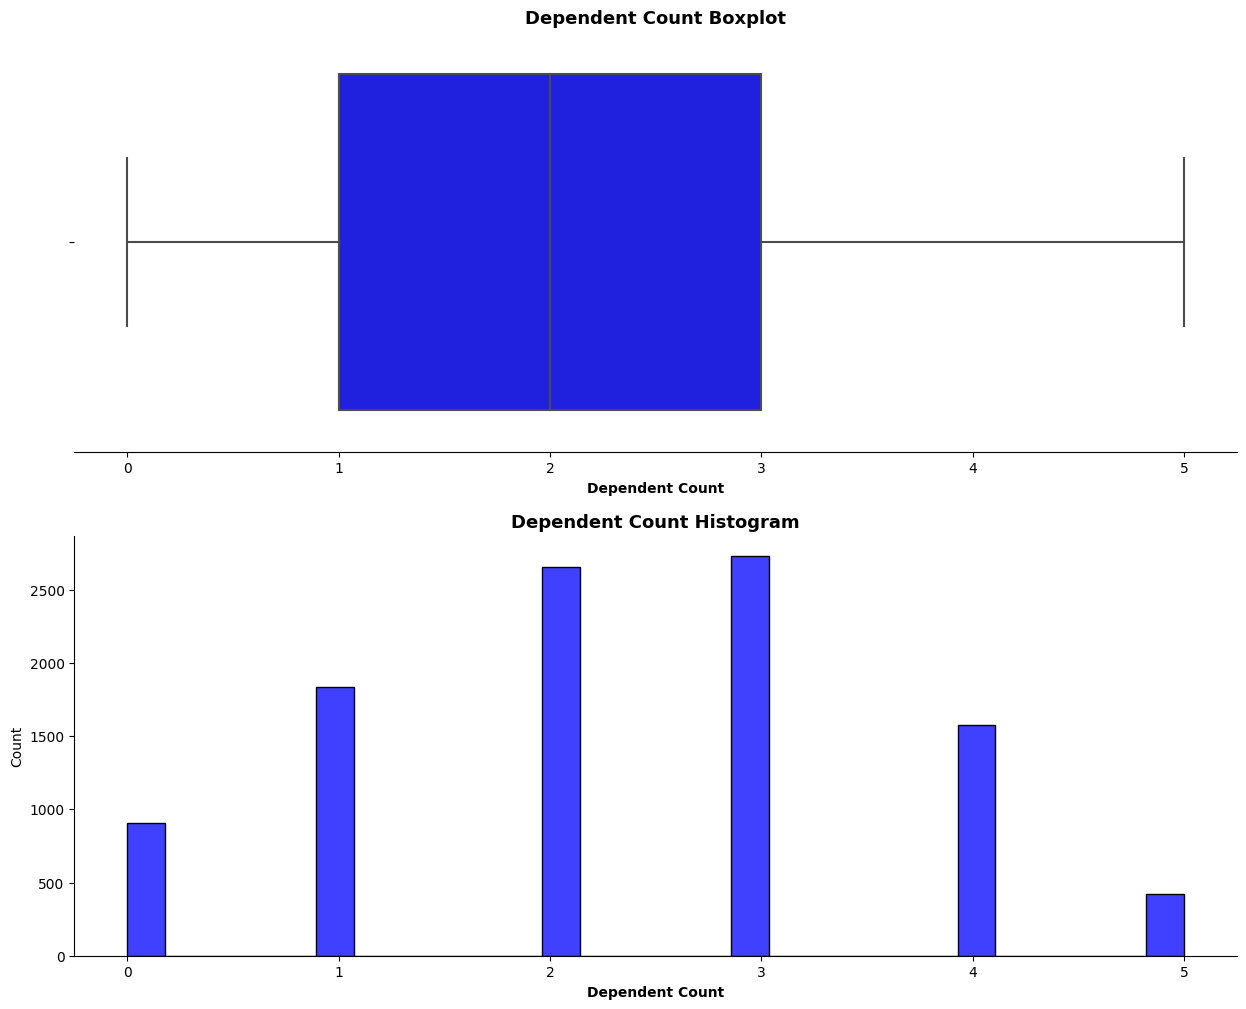

In [42]:
# First we'll look at a countplot and a histogram to see the overal distribution.

# Setting two plots, one above the other
fig, ax = plt.subplots(2, 1, figsize=(15,12))

# A seaborn grouped boxplot, choose as x axis and dataset to pull from
ax = sns.boxplot(x="dependent_count",
            data=combo_df, 
            color="blue",
            ax=ax[0])

# Adds a title, changes size and weight of title font
ax.set_title('Dependent Count Boxplot', fontdict={'size': 13, 'weight': 'semibold'})

# Changes the x label from the column name to what we want
ax.set_xlabel('Dependent Count', 
               fontweight ='bold')

# Hides the top bar
ax.spines['top'].set_visible(False)
# Hides the left bar
ax.spines['left'].set_visible(False)
# Hides the right bar
ax.spines['right'].set_visible(False)

ax1 = sns.histplot(x = "dependent_count",
                  data=combo_df,
                  color="blue")
ax1.set_title('Dependent Count Histogram', fontdict={'size': 13, 'weight': 'semibold'})
ax1.set_xlabel('Dependent Count', 
               fontweight ='bold')
ax1.spines['top'].set_visible(False)
ax1.spines['right'].set_visible(False)

> Let's also utilize Z-Score and Interquartile Range to verify the results that we obtained.

In [35]:
# Z-Score can help us to see how far a data point is from the average. 
# Z-score = (data_point - average)/standard_deviation 
# However, using numpy and stats from scipy, we have built in functions that can help us to easily calculate the z-score! 

# Setting the threshold 

# The threshold is very dependent on business context and how much tolerance there is for outliers 
# Typically, we set the threshold to 3 because 99.7% of data points fall between +/- 3 standard deviation 
# and 0.3% fall outside of this interval.

threshold = 3 

# abs() function returns the absolute value of an object and is only applicable to numberic values
zscore = np.abs(stats.zscore(combo_df['dependent_count']))

# Using .where to locate the row(s) with outliers
print(np.where(zscore > threshold))

(array([], dtype=int64),)


> Z-Score returned no rows with an outlier. Let's lastly take a look at Interquartile Range (IQR)!

In [36]:
# IQR lets us know where most of the values sit by measuring the spread of the middle 50% of datapoints
# IQR = 3rd_quartile - 1rst_quartile

# Using numpy.percentile we can easily calculate these numbers! 
# We'll use the optional parameter "method" to specify how we want the percentile to me estimated. 
# "midpoint" tells this function to take both the lower and the higher of the values in the dataset and divide them by two

first_quartile = np.percentile(combo_df['dependent_count'], 25, method = 'midpoint')
third_quartile = np.percentile(combo_df['dependent_count'], 75, method = 'midpoint')

IQR = third_quartile - first_quartile
IQR

2.0

> Now that we have the IQR we can use that number to define upper and lower bounds. 

In [37]:
# Upper and lower bounds are the maximum and minimum values that a number can be before it's an outlier
# Upper = 3rd_quartile + (1.5 * IQR)
# Lower = 1rst_quartile - (1.5 * IQR)

# We use 1.5 because it brings us closest to what Gaussian Distribution considers an outlier
# 1 allows for too many outliers and 2 results in too few outliers
# 1.7 DOES technically bring us CLOSEST, but 1.5 is easier to remember and is seen as the standard 

upper_bound = third_quartile + (1.5 * IQR)
lower_bound = first_quartile - (1.5 * IQR)

In [39]:
# Now let's find the values in the customer_age column that are above the upper bound
upper = combo_df['dependent_count'] >= upper_bound
 
# And the values in the customer_age column that are below the lower bound
lower = combo_df['dependent_count'] <= lower_bound

In [40]:
# Let's print the rows where values are above or below our defined bounds AKA our outliers! 

print(np.where(upper))
print(np.where(lower))

(array([], dtype=int64),)
(array([], dtype=int64),)


> We'll be exclusing the use of z-score moving forward. The boxplot is a great visualization and IQR is more than enough for when we need a deeper dive, so we'll stick with these two.

### 2. months_on_book

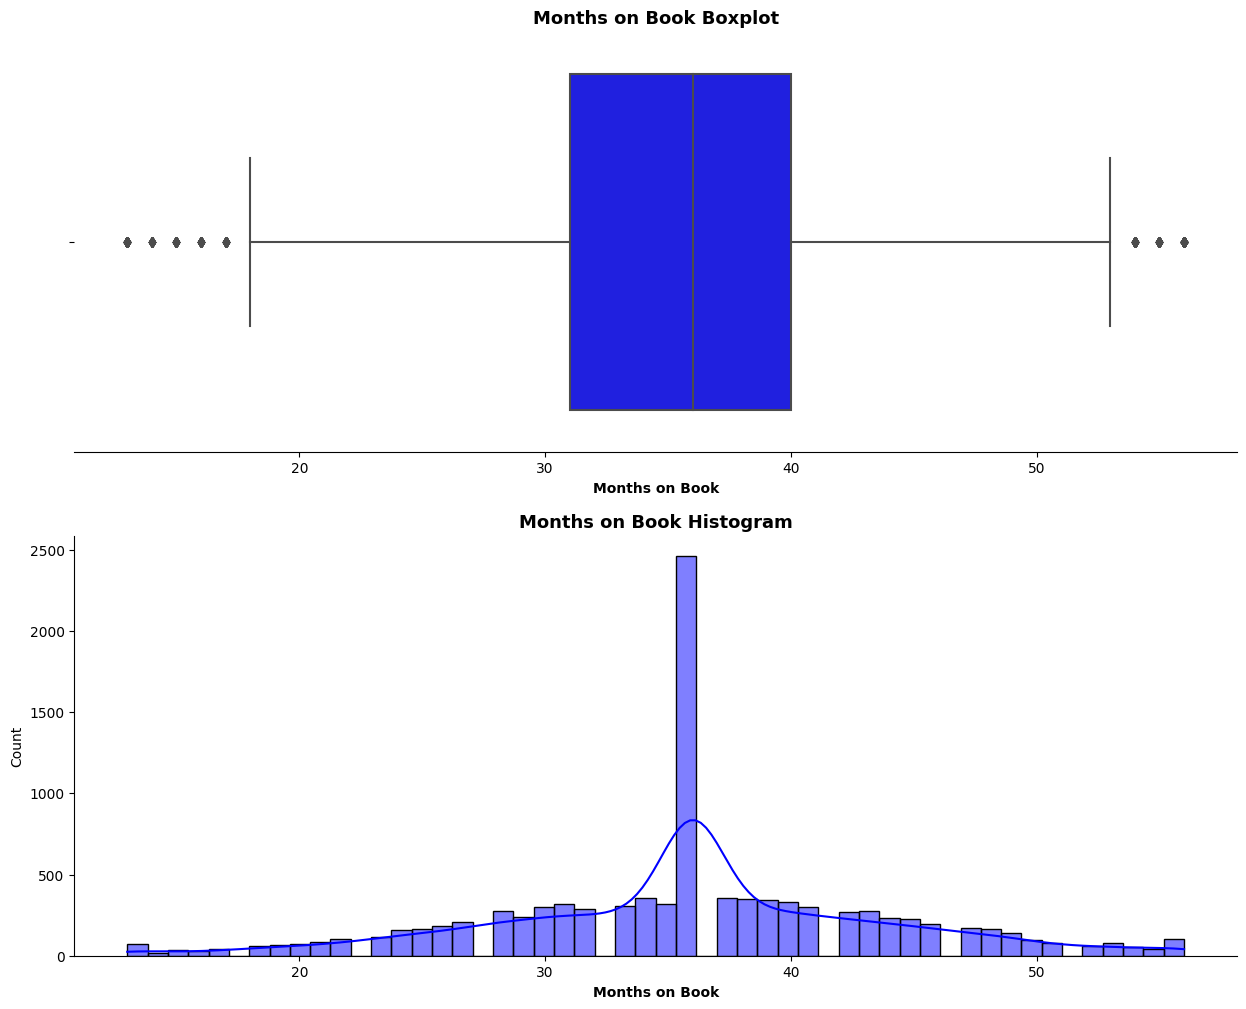

In [44]:
fig, ax = plt.subplots(2, 1, figsize=(15,12))

ax = sns.boxplot(x="months_on_book",
            data=combo_df, 
            color="blue",
            ax=ax[0])

ax.set_title('Months on Book Boxplot', fontdict={'size': 13, 'weight': 'semibold'})

ax.set_xlabel('Months on Book', 
               fontweight ='bold')

ax.spines['top'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.spines['right'].set_visible(False)

ax1 = sns.histplot(x = "months_on_book",
                  data=combo_df,
                  kde=True,
                  color="blue")
ax1.set_title('Months on Book Histogram', fontdict={'size': 13, 'weight': 'semibold'})
ax1.set_xlabel('Months on Book', 
               fontweight ='bold')
ax1.spines['top'].set_visible(False)
ax1.spines['right'].set_visible(False)

> A great number of clients have been with the bank for 3 years. The outliers fit in with the overall distribution, therefore we'll leave them in. 

### 3. months_inactive_12_mon

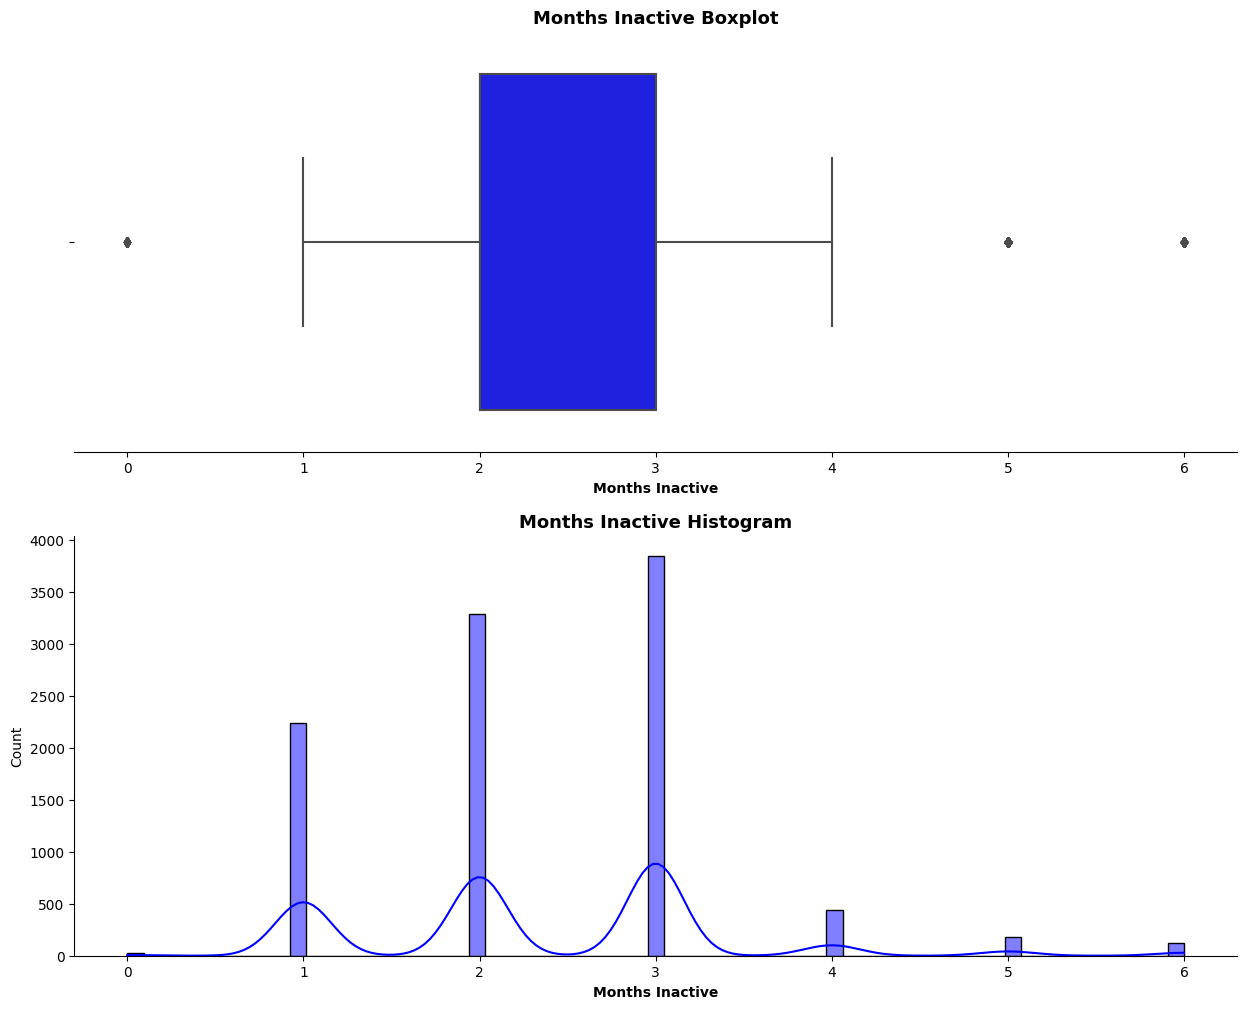

In [45]:
fig, ax = plt.subplots(2, 1, figsize=(15,12))

ax = sns.boxplot(x="months_inactive_12_mon",
            data=combo_df, 
            color="blue",
            ax=ax[0])

ax.set_title('Months Inactive Boxplot', fontdict={'size': 13, 'weight': 'semibold'})

ax.set_xlabel('Months Inactive', 
               fontweight ='bold')

ax.spines['top'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.spines['right'].set_visible(False)

ax1 = sns.histplot(x = "months_inactive_12_mon",
                  data=combo_df,
                  kde=True,
                  color="blue")
ax1.set_title('Months Inactive Histogram', fontdict={'size': 13, 'weight': 'semibold'})
ax1.set_xlabel('Months Inactive', 
               fontweight ='bold')
ax1.spines['top'].set_visible(False)
ax1.spines['right'].set_visible(False)

> It looks like clients are mostly inactive for 1-3 months. It makes sense that 0, 5 and 6 are seen as outliers, however, there's no reason to remove them. 

### 4. contacts_count_12_mon

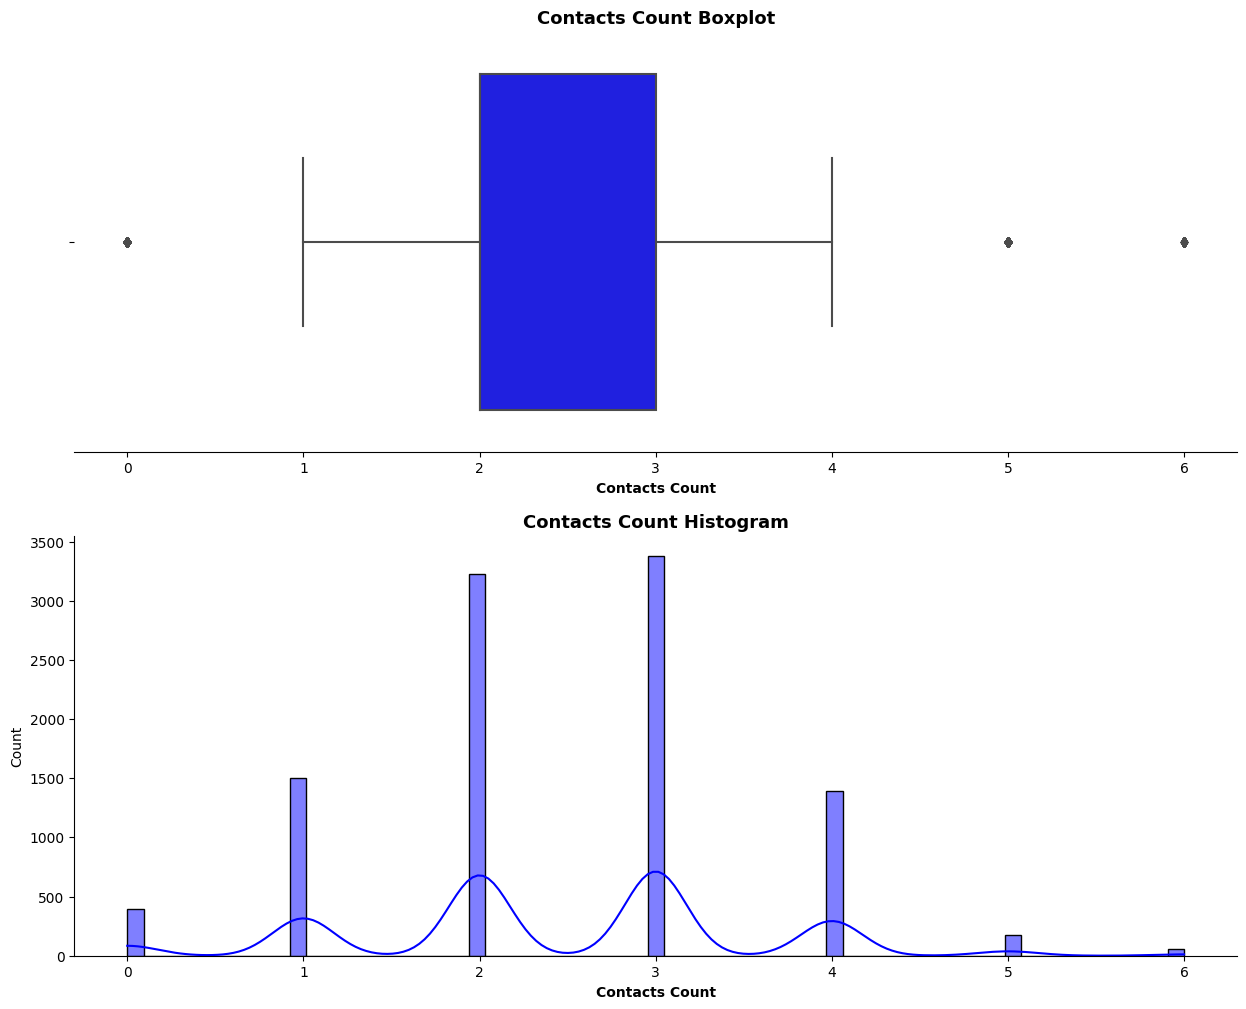

In [46]:
fig, ax = plt.subplots(2, 1, figsize=(15,12))

ax = sns.boxplot(x="contacts_count_12_mon",
            data=combo_df, 
            color="blue",
            ax=ax[0])

ax.set_title('Contacts Count Boxplot', fontdict={'size': 13, 'weight': 'semibold'})

ax.set_xlabel('Contacts Count', 
               fontweight ='bold')

ax.spines['top'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.spines['right'].set_visible(False)

ax1 = sns.histplot(x = "contacts_count_12_mon",
                  data=combo_df,
                  kde=True,
                  color="blue")
ax1.set_title('Contacts Count Histogram', fontdict={'size': 13, 'weight': 'semibold'})
ax1.set_xlabel('Contacts Count', 
               fontweight ='bold')
ax1.spines['top'].set_visible(False)
ax1.spines['right'].set_visible(False)

> It looks like clients have 1-3 contacts. 0, 5 and 6 are seen as outliers, however, there's no reason to remove them. 

### 5. credit_limit

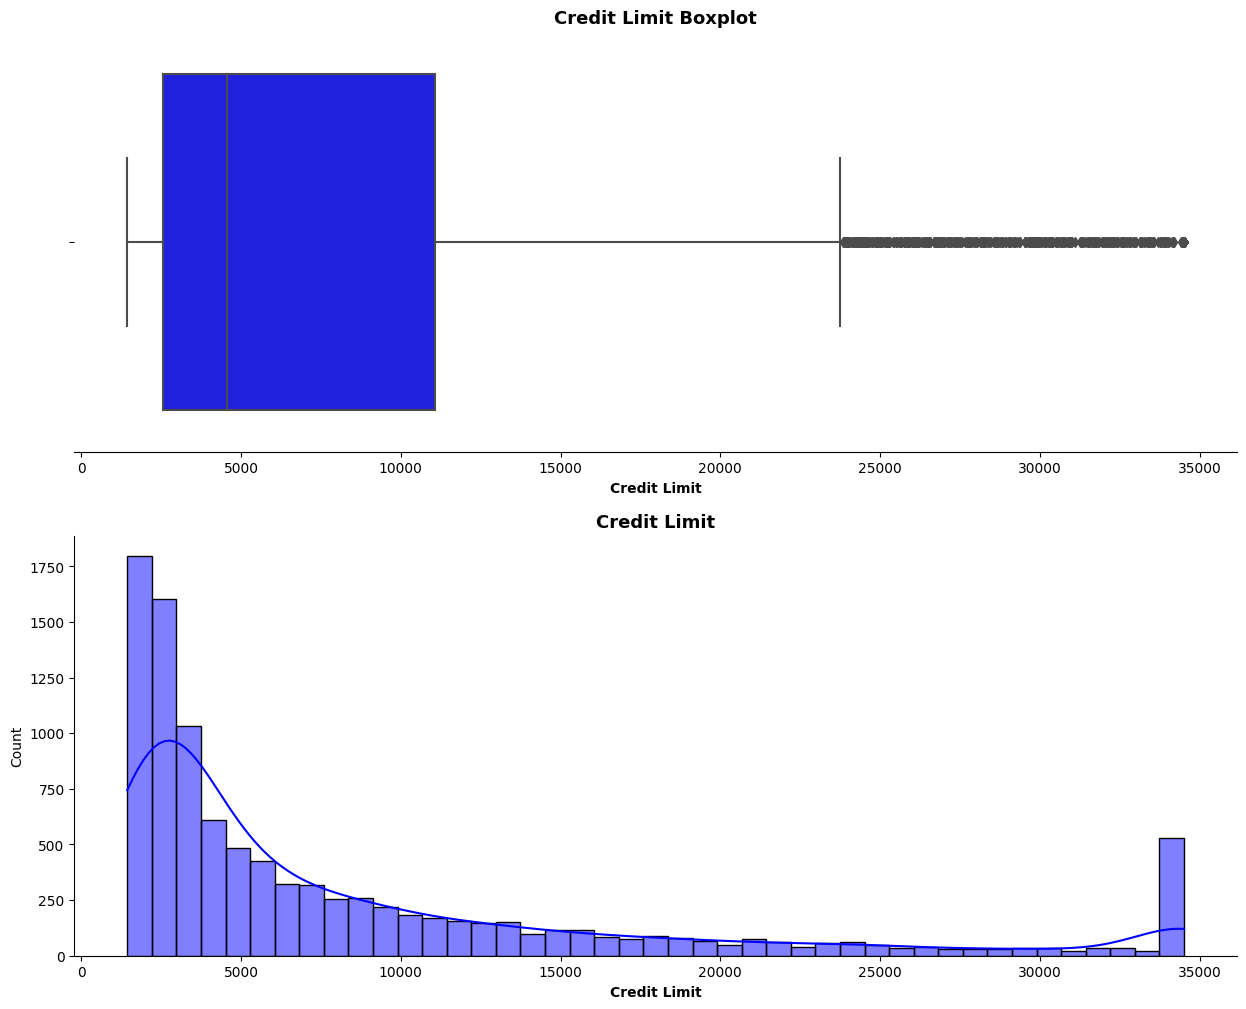

In [47]:
fig, ax = plt.subplots(2, 1, figsize=(15,12))

ax = sns.boxplot(x="credit_limit",
            data=combo_df, 
            color="blue",
            ax=ax[0])

ax.set_title('Credit Limit Boxplot', fontdict={'size': 13, 'weight': 'semibold'})

ax.set_xlabel('Credit Limit', 
               fontweight ='bold')

ax.spines['top'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.spines['right'].set_visible(False)

ax1 = sns.histplot(x = "credit_limit",
                  data=combo_df,
                  kde=True,
                  color="blue")
ax1.set_title('Credit Limit', fontdict={'size': 13, 'weight': 'semibold'})
ax1.set_xlabel('Credit Limit', 
               fontweight ='bold')
ax1.spines['top'].set_visible(False)
ax1.spines['right'].set_visible(False)

> The distribution is right skewed. There also /seems/ to be a large number of outliers because everything over ≈23k has been categorized as an outlier. I wonder if we look at this column in relation to customers' income and in relation to their average open to buy, if we would get a different picture. Let's take a look! 

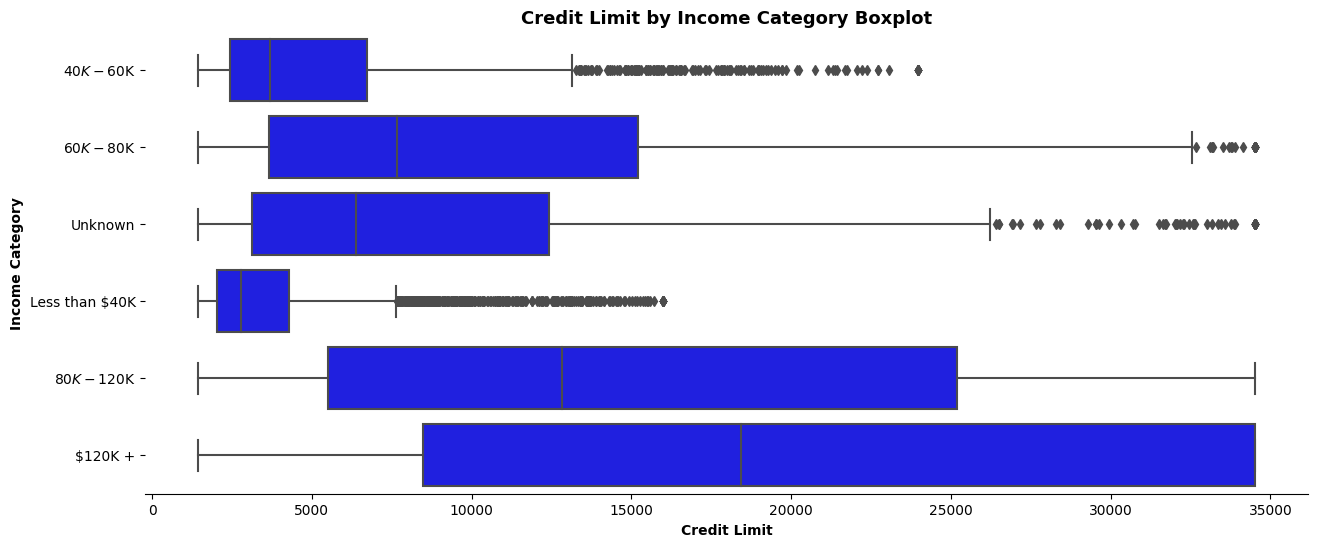

In [57]:
fig, ax = plt.subplots(figsize=(15,6))

ax = sns.boxplot(x="credit_limit",
            y="income_category",
            data=combo_df, 
            color="blue")

ax.set_title('Credit Limit by Income Category Boxplot', fontdict={'size': 13, 'weight': 'semibold'})

ax.set_xlabel('Credit Limit', 
               fontweight ='bold')

ax.set_ylabel('Income Category', 
               fontweight = 'bold')

ax.spines['top'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.spines['right'].set_visible(False)

> Now that we look at credit limit values in relation to the customers' income category we can see that the values previously categorized as outliers make more sense contextually and are okay to leave in our data. 

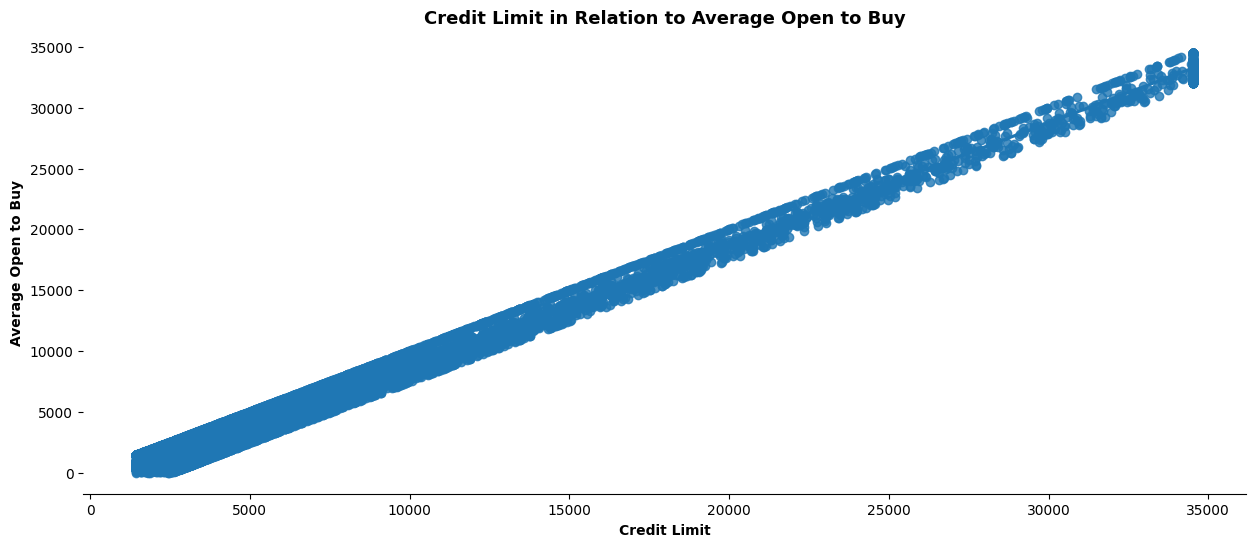

In [58]:
fig, ax = plt.subplots(figsize=(15,6))

ax = sns.regplot(x="credit_limit",
            y="avg_open_to_buy",
            data=combo_df)

ax.set_title('Credit Limit in Relation to Average Open to Buy', fontdict={'size': 13, 'weight': 'semibold'})

ax.set_xlabel('Credit Limit', 
               fontweight ='bold')

ax.set_ylabel('Average Open to Buy', 
               fontweight = 'bold')

ax.spines['top'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.spines['right'].set_visible(False)

> Seeing the credit limits in relation to average open to buy shows us that they are very strongly correlated! This further reinforces my decision to leave these values in the data.

### 6. avg_open_to_buy

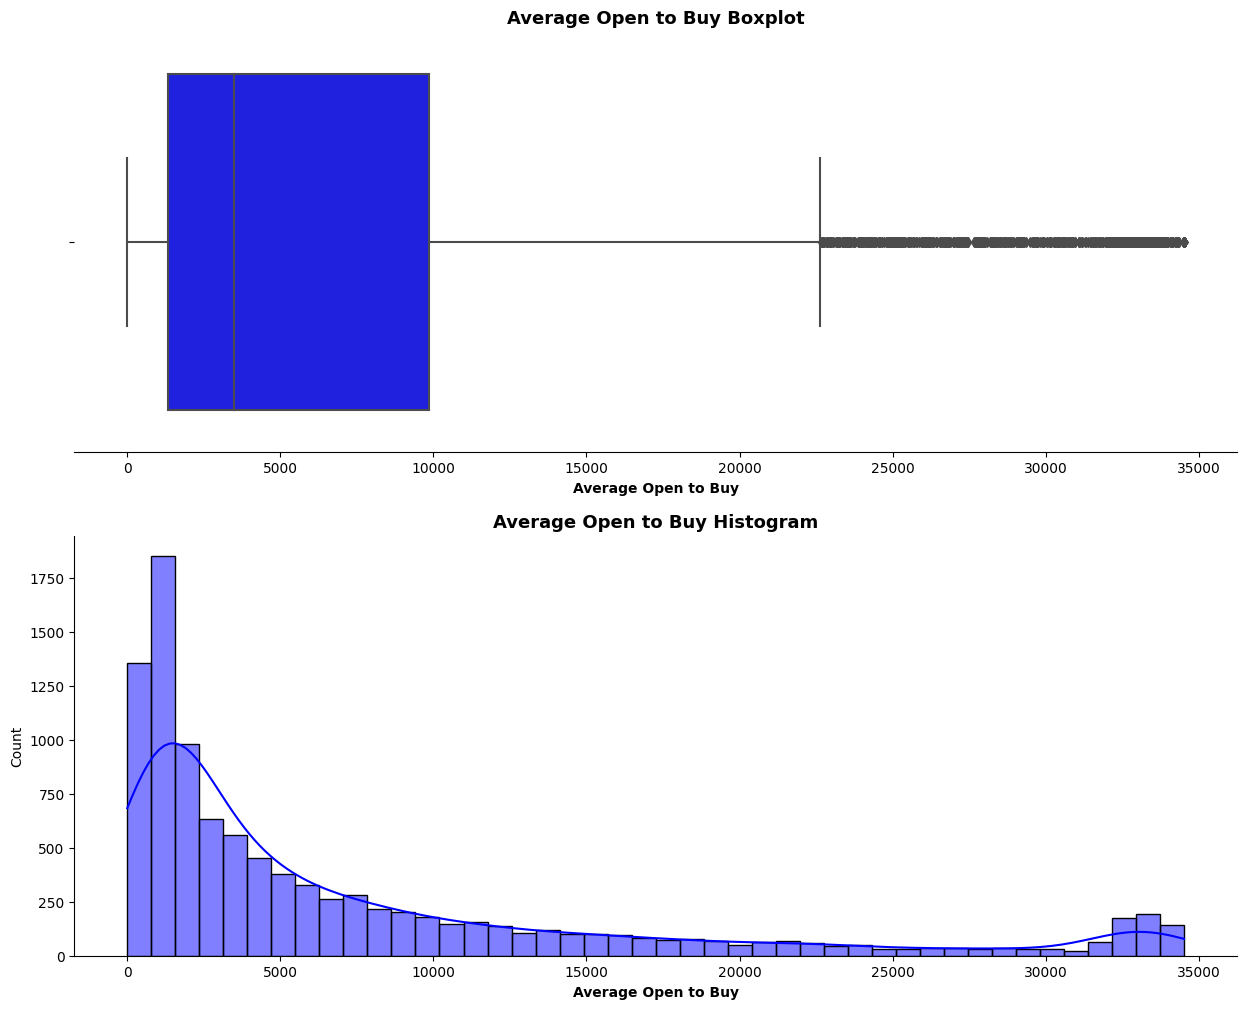

In [48]:
fig, ax = plt.subplots(2, 1, figsize=(15,12))

ax = sns.boxplot(x="avg_open_to_buy",
            data=combo_df, 
            color="blue",
            ax=ax[0])

ax.set_title('Average Open to Buy Boxplot', fontdict={'size': 13, 'weight': 'semibold'})

ax.set_xlabel('Average Open to Buy', 
               fontweight ='bold')

ax.spines['top'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.spines['right'].set_visible(False)

ax1 = sns.histplot(x = "avg_open_to_buy",
                  data=combo_df,
                  kde=True,
                  color="blue")
ax1.set_title('Average Open to Buy Histogram', fontdict={'size': 13, 'weight': 'semibold'})
ax1.set_xlabel('Average Open to Buy', 
               fontweight ='bold')
ax1.spines['top'].set_visible(False)
ax1.spines['right'].set_visible(False)

> We saw when looking at the credit limits that these values are in line contextually. It is therefore okay to leave them in. 

### 7. avg_utilization_ratio

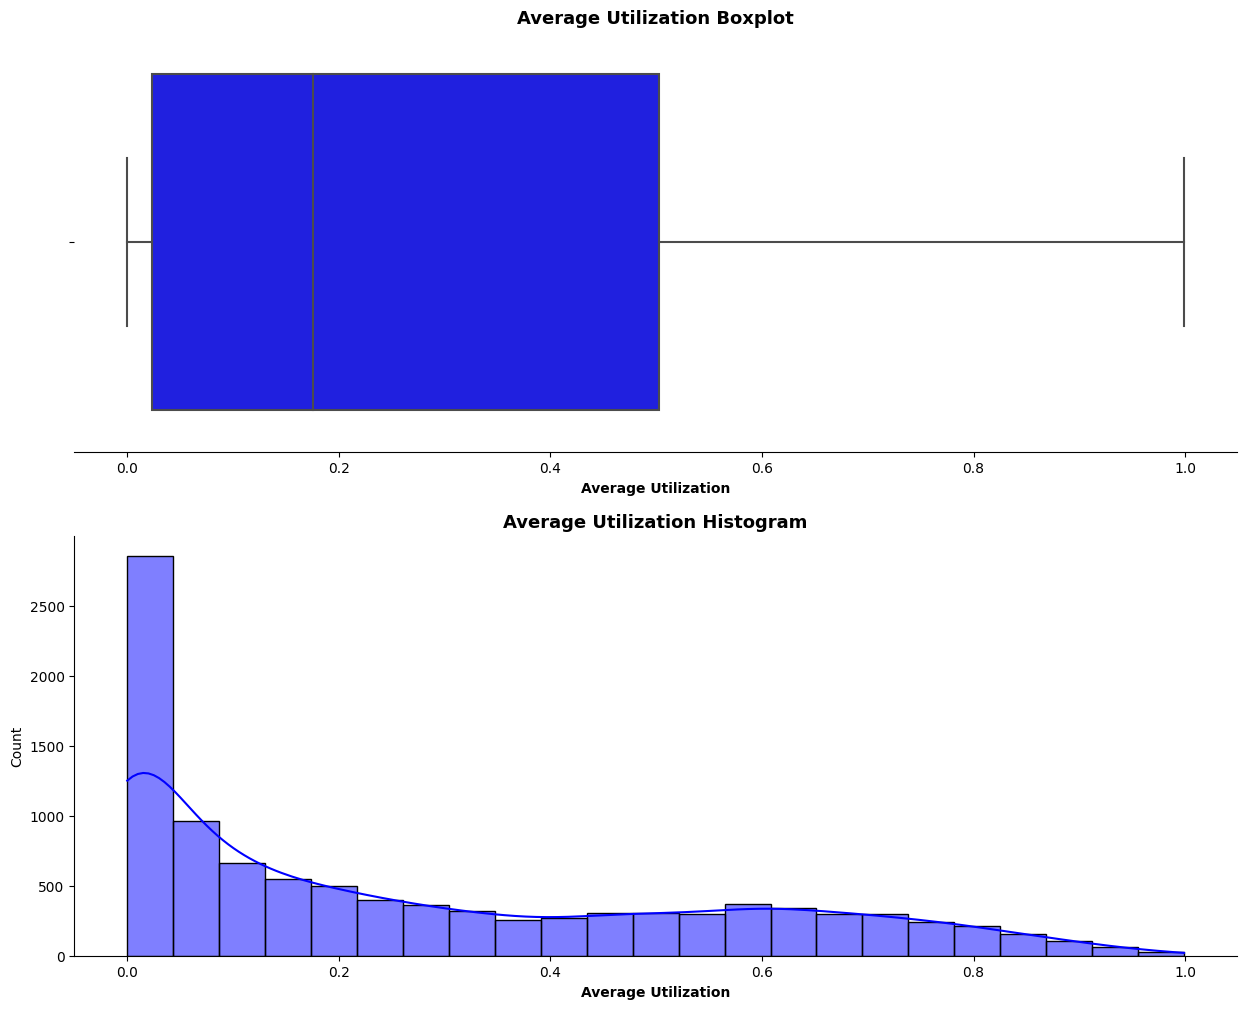

In [59]:
fig, ax = plt.subplots(2, 1, figsize=(15,12))

ax = sns.boxplot(x="avg_utilization_ratio",
            data=combo_df, 
            color="blue",
            ax=ax[0])

ax.set_title('Average Utilization Boxplot', fontdict={'size': 13, 'weight': 'semibold'})

ax.set_xlabel('Average Utilization', 
               fontweight ='bold')

ax.spines['top'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.spines['right'].set_visible(False)

ax1 = sns.histplot(x = "avg_utilization_ratio",
                  data=combo_df,
                  kde=True,
                  color="blue")
ax1.set_title('Average Utilization Histogram', fontdict={'size': 13, 'weight': 'semibold'})
ax1.set_xlabel('Average Utilization', 
               fontweight ='bold')
ax1.spines['top'].set_visible(False)
ax1.spines['right'].set_visible(False)

### 8. customer_age

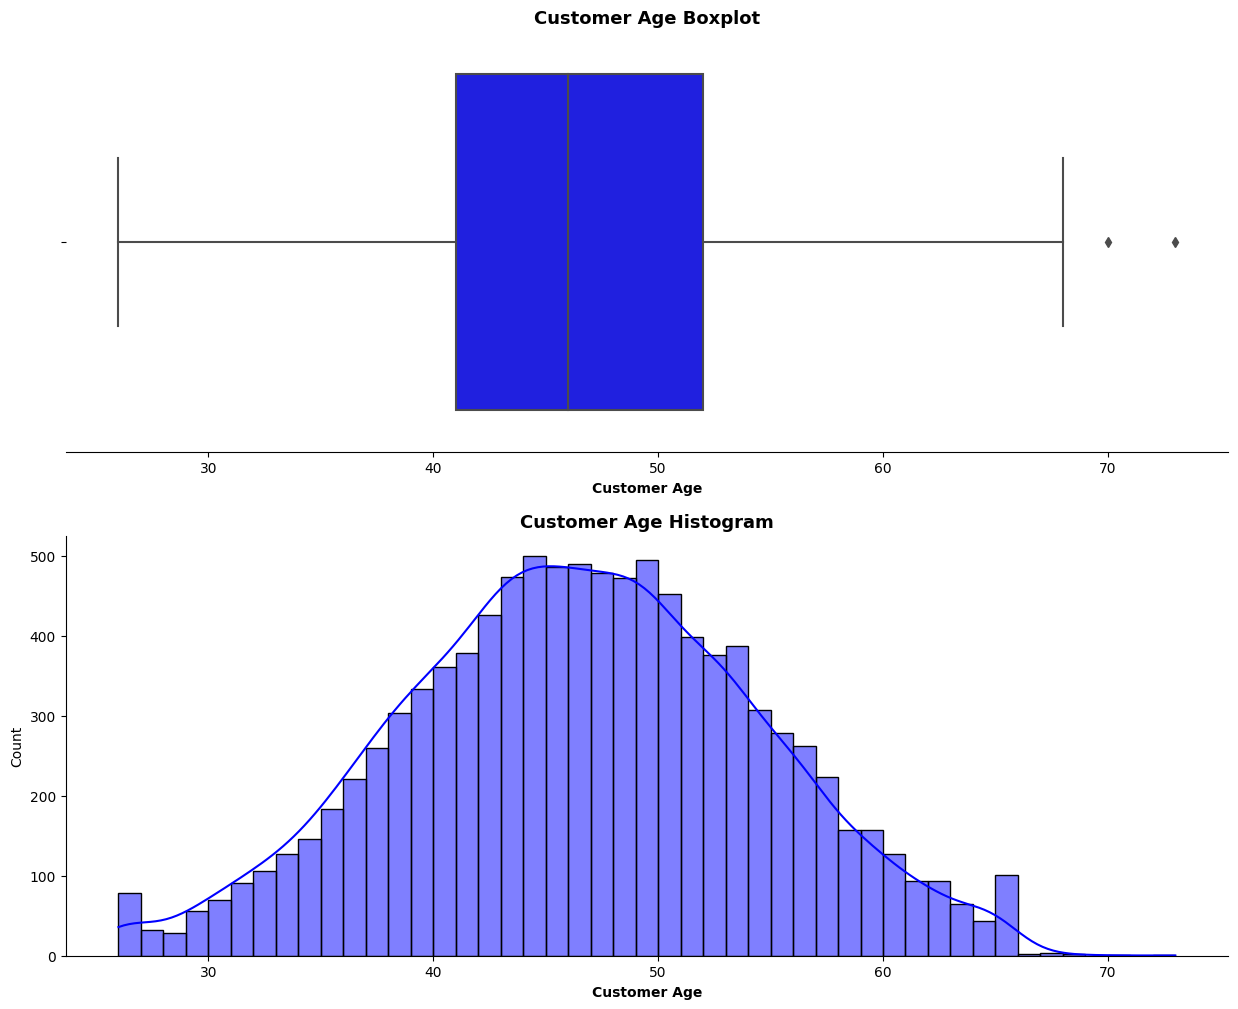

In [60]:
fig, ax = plt.subplots(2, 1, figsize=(15,12))

ax = sns.boxplot(x="customer_age",
            data=combo_df, 
            color="blue",
            ax=ax[0])

ax.set_title('Customer Age Boxplot', fontdict={'size': 13, 'weight': 'semibold'})

ax.set_xlabel('Customer Age', 
               fontweight ='bold')

ax.spines['top'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.spines['right'].set_visible(False)

ax1 = sns.histplot(x = "customer_age",
                  data=combo_df,
                  kde=True,
                  color="blue")
ax1.set_title('Customer Age Histogram', fontdict={'size': 13, 'weight': 'semibold'})
ax1.set_xlabel('Customer Age', 
               fontweight ='bold')
ax1.spines['top'].set_visible(False)
ax1.spines['right'].set_visible(False)

In [74]:
# Printing out the rows where customer age is above 68
print(np.where(basic_client_info_df['customer_age']>68))

(array([4115, 8317]),)


In [75]:
basic_client_info_df.iloc[4115]

clientnum            715952883
customer_age                73
gender                       M
education_level    High School
marital_status         Married
income_category    $40K - $60K
Name: 4115, dtype: object

In [76]:
basic_client_info_df.iloc[8317]

clientnum               787348608
customer_age                   70
gender                          M
education_level       High School
marital_status            Married
income_category    Less than $40K
Name: 8317, dtype: object

> It's good to know that these two customers are outliers based on their age. However, we're not going to exclude them from our data because two rows won't significantly affect the results of our analysis. 

### 9. total_relationship_count

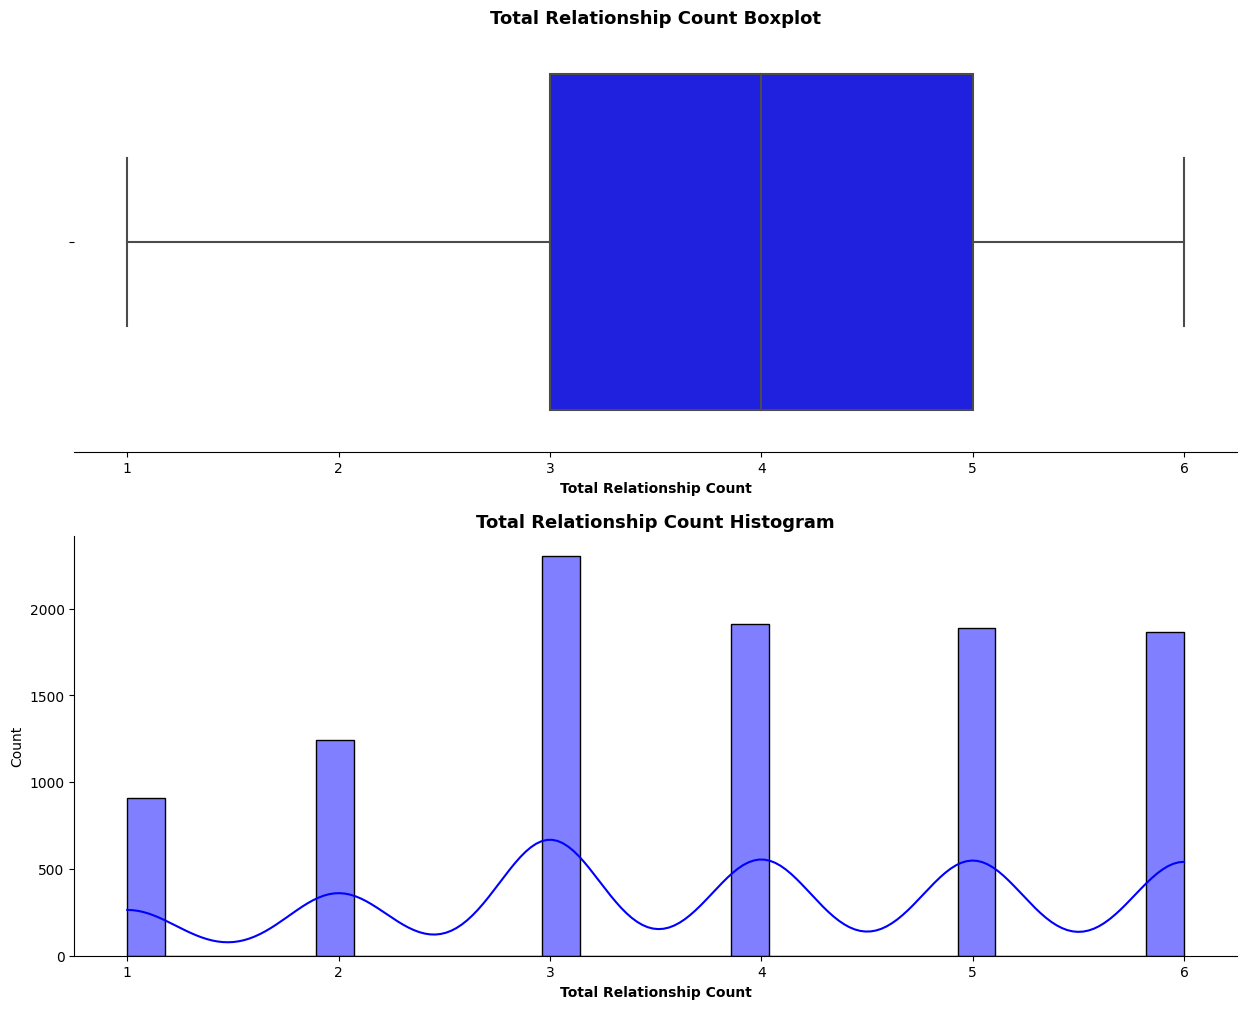

In [61]:
fig, ax = plt.subplots(2, 1, figsize=(15,12))

ax = sns.boxplot(x="total_relationship_count",
            data=combo_df, 
            color="blue",
            ax=ax[0])

ax.set_title('Total Relationship Count Boxplot', fontdict={'size': 13, 'weight': 'semibold'})

ax.set_xlabel('Total Relationship Count', 
               fontweight ='bold')

ax.spines['top'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.spines['right'].set_visible(False)

ax1 = sns.histplot(x = "total_relationship_count",
                  data=combo_df,
                  kde=True,
                  color="blue")
ax1.set_title('Total Relationship Count Histogram', fontdict={'size': 13, 'weight': 'semibold'})
ax1.set_xlabel('Total Relationship Count', 
               fontweight ='bold')
ax1.spines['top'].set_visible(False)
ax1.spines['right'].set_visible(False)

### 10. total_revolving_bal

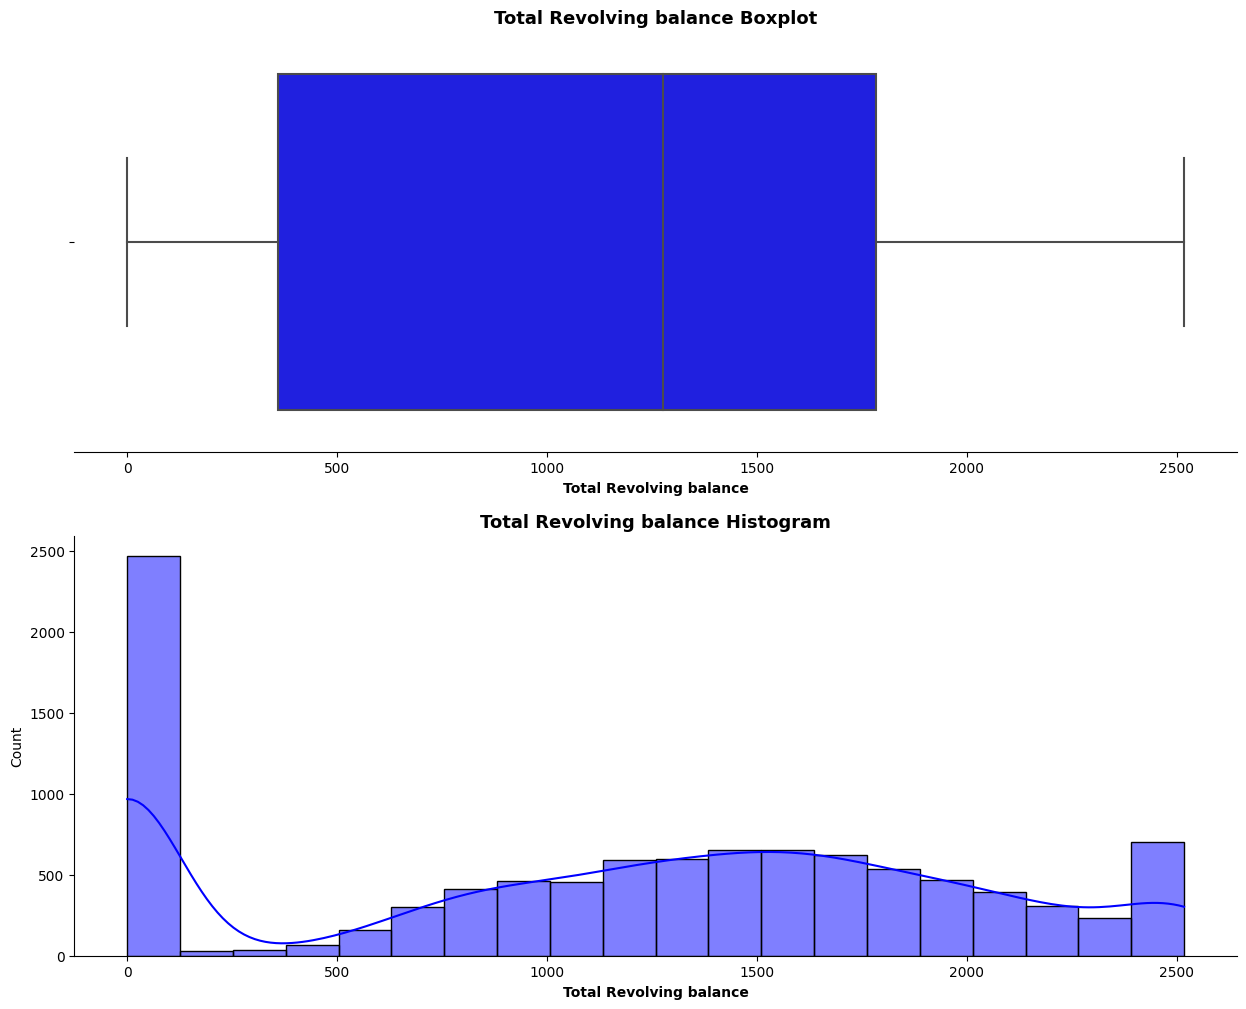

In [62]:
fig, ax = plt.subplots(2, 1, figsize=(15,12))

ax = sns.boxplot(x="total_revolving_bal",
            data=combo_df, 
            color="blue",
            ax=ax[0])

ax.set_title('Total Revolving balance Boxplot', fontdict={'size': 13, 'weight': 'semibold'})

ax.set_xlabel('Total Revolving balance', 
               fontweight ='bold')

ax.spines['top'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.spines['right'].set_visible(False)

ax1 = sns.histplot(x = "total_revolving_bal",
                  data=combo_df,
                  kde=True,
                  color="blue")
ax1.set_title('Total Revolving balance Histogram', fontdict={'size': 13, 'weight': 'semibold'})
ax1.set_xlabel('Total Revolving balance', 
               fontweight ='bold')
ax1.spines['top'].set_visible(False)
ax1.spines['right'].set_visible(False)

### 11. total_amt_chng_q4_q1

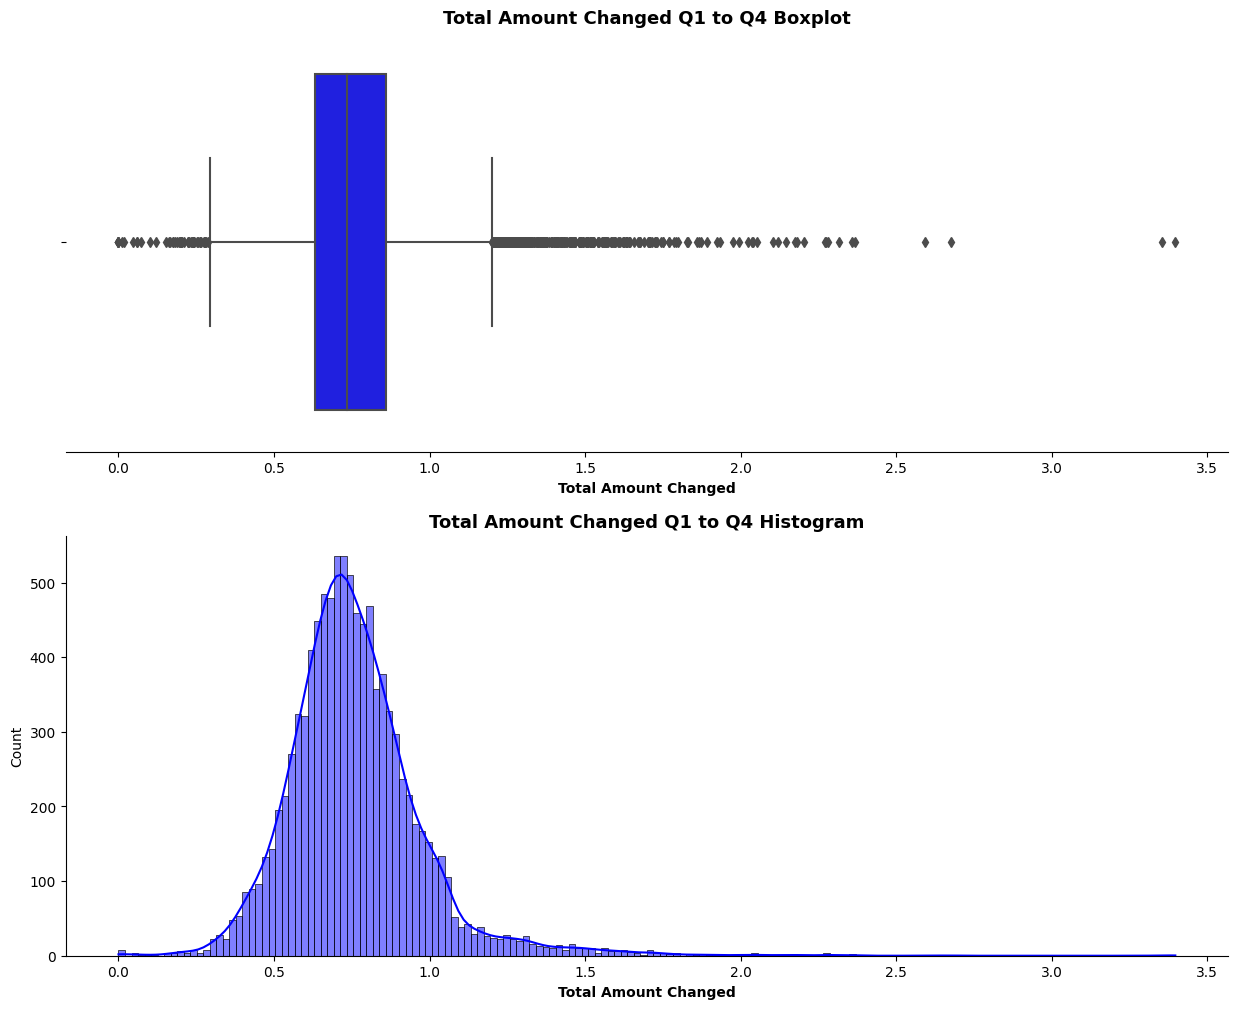

In [63]:
fig, ax = plt.subplots(2, 1, figsize=(15,12))

ax = sns.boxplot(x="total_amt_chng_q4_q1",
            data=combo_df, 
            color="blue",
            ax=ax[0])

ax.set_title('Total Amount Changed Q1 to Q4 Boxplot', fontdict={'size': 13, 'weight': 'semibold'})

ax.set_xlabel('Total Amount Changed', 
               fontweight ='bold')

ax.spines['top'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.spines['right'].set_visible(False)

ax1 = sns.histplot(x = "total_amt_chng_q4_q1",
                  data=combo_df,
                  kde=True,
                  color="blue")
ax1.set_title('Total Amount Changed Q1 to Q4 Histogram', fontdict={'size': 13, 'weight': 'semibold'})
ax1.set_xlabel('Total Amount Changed', 
               fontweight ='bold')
ax1.spines['top'].set_visible(False)
ax1.spines['right'].set_visible(False)

> This column is measuring the transaction amounts between Q1 and Q4. It's categorizing larger values as outliers, however, we know the data includes both existing customers and those who have left the bank. I wonder if we look at these values in that context, if we'd have a better understanding. 

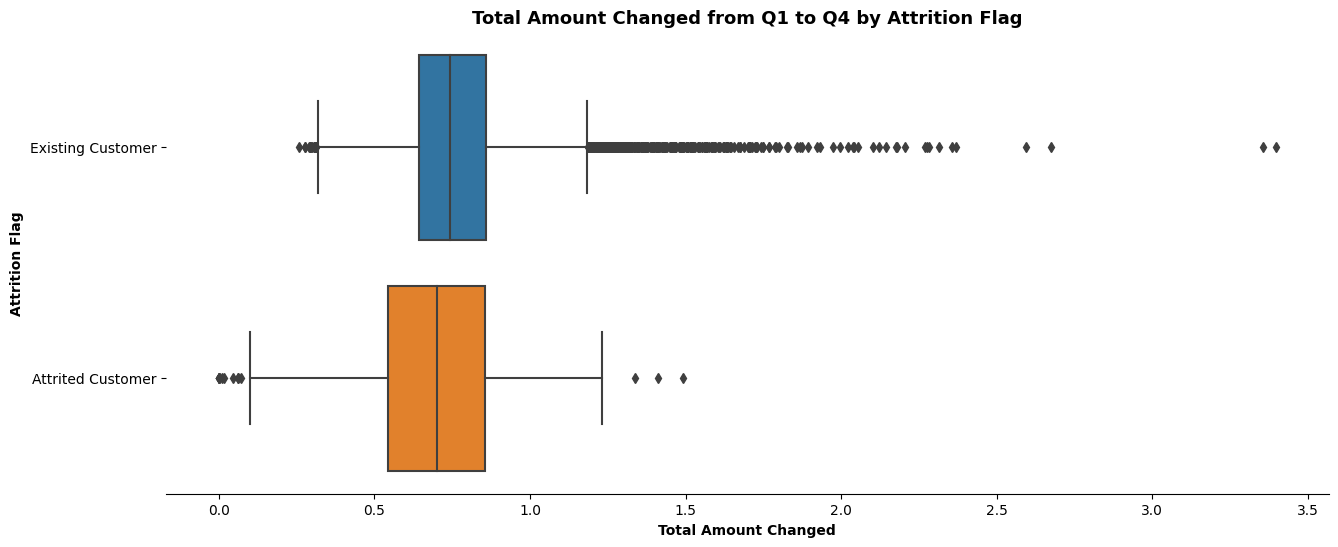

In [64]:
fig, ax = plt.subplots(figsize=(15,6))

ax = sns.boxplot(x="total_amt_chng_q4_q1",
            y="attrition_flag",
            data=combo_df)

ax.set_title('Total Amount Changed from Q1 to Q4 by Attrition Flag', fontdict={'size': 13, 'weight': 'semibold'})

ax.set_xlabel('Total Amount Changed', 
               fontweight ='bold')

ax.set_ylabel('Attrition Flag', 
               fontweight = 'bold')

ax.spines['top'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.spines['right'].set_visible(False)

> Here we can see that the outliers largely fall to existing customers. It's entirely plausible that a customer had more transactions from one quarter to another and, therefore, there is not reason to remove this data. 

### 12. total_trans_amt

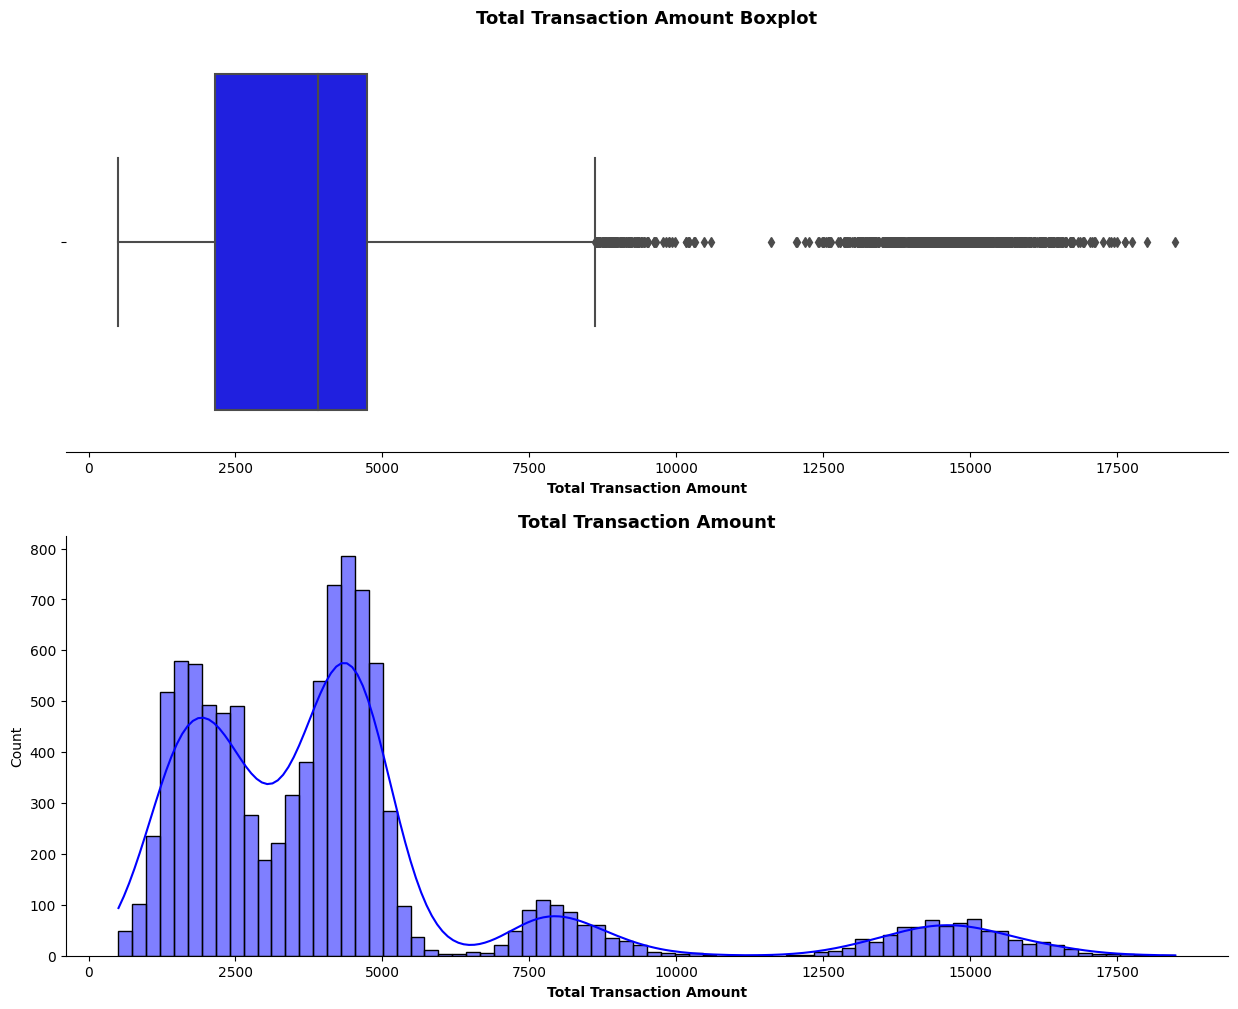

In [65]:
fig, ax = plt.subplots(2, 1, figsize=(15,12))

ax = sns.boxplot(x="total_trans_amt",
            data=combo_df, 
            color="blue",
            ax=ax[0])

ax.set_title('Total Transaction Amount Boxplot', fontdict={'size': 13, 'weight': 'semibold'})

ax.set_xlabel('Total Transaction Amount', 
               fontweight ='bold')

ax.spines['top'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.spines['right'].set_visible(False)

ax1 = sns.histplot(x = "total_trans_amt",
                  data=combo_df,
                  kde=True,
                  color="blue")
ax1.set_title('Total Transaction Amount', fontdict={'size': 13, 'weight': 'semibold'})
ax1.set_xlabel('Total Transaction Amount', 
               fontweight ='bold')
ax1.spines['top'].set_visible(False)
ax1.spines['right'].set_visible(False)

> There /seems/ to be a large number of outliers because everything over ≈8.5k has been categorized as an outlier. I wonder if we look at this column in relation to their total transaction counts, if we would get a different picture. Let's take a look! 

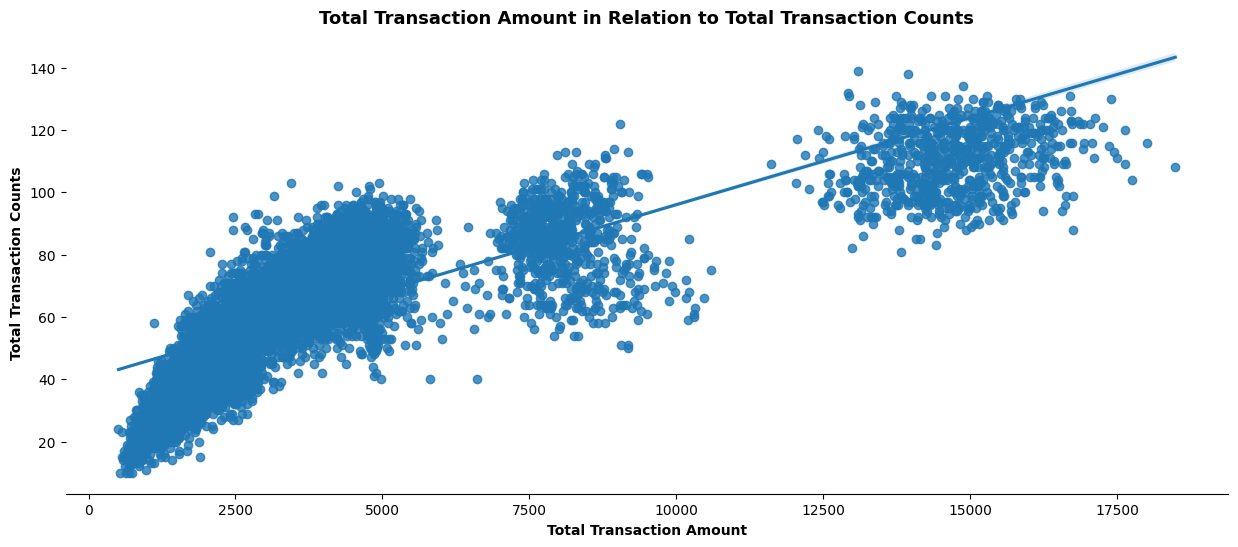

In [68]:
fig, ax = plt.subplots(figsize=(15,6))

ax = sns.regplot(x="total_trans_amt",
            y="total_trans_ct",
            data=combo_df)

ax.set_title('Total Transaction Amount in Relation to Total Transaction Counts', fontdict={'size': 13, 'weight': 'semibold'})

ax.set_xlabel('Total Transaction Amount', 
               fontweight ='bold')

ax.set_ylabel('Total Transaction Counts', 
               fontweight = 'bold')

ax.spines['top'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.spines['right'].set_visible(False)

> Seeing the total transaction amounts in relation to total transaction counts shows us that they are somewhat correlated! Customers with higher total transaction counts also typically have higher total transaction amounts. It is therefore okay to leave these outliers in the data.

### 13. total_ct_chng_q4_q1

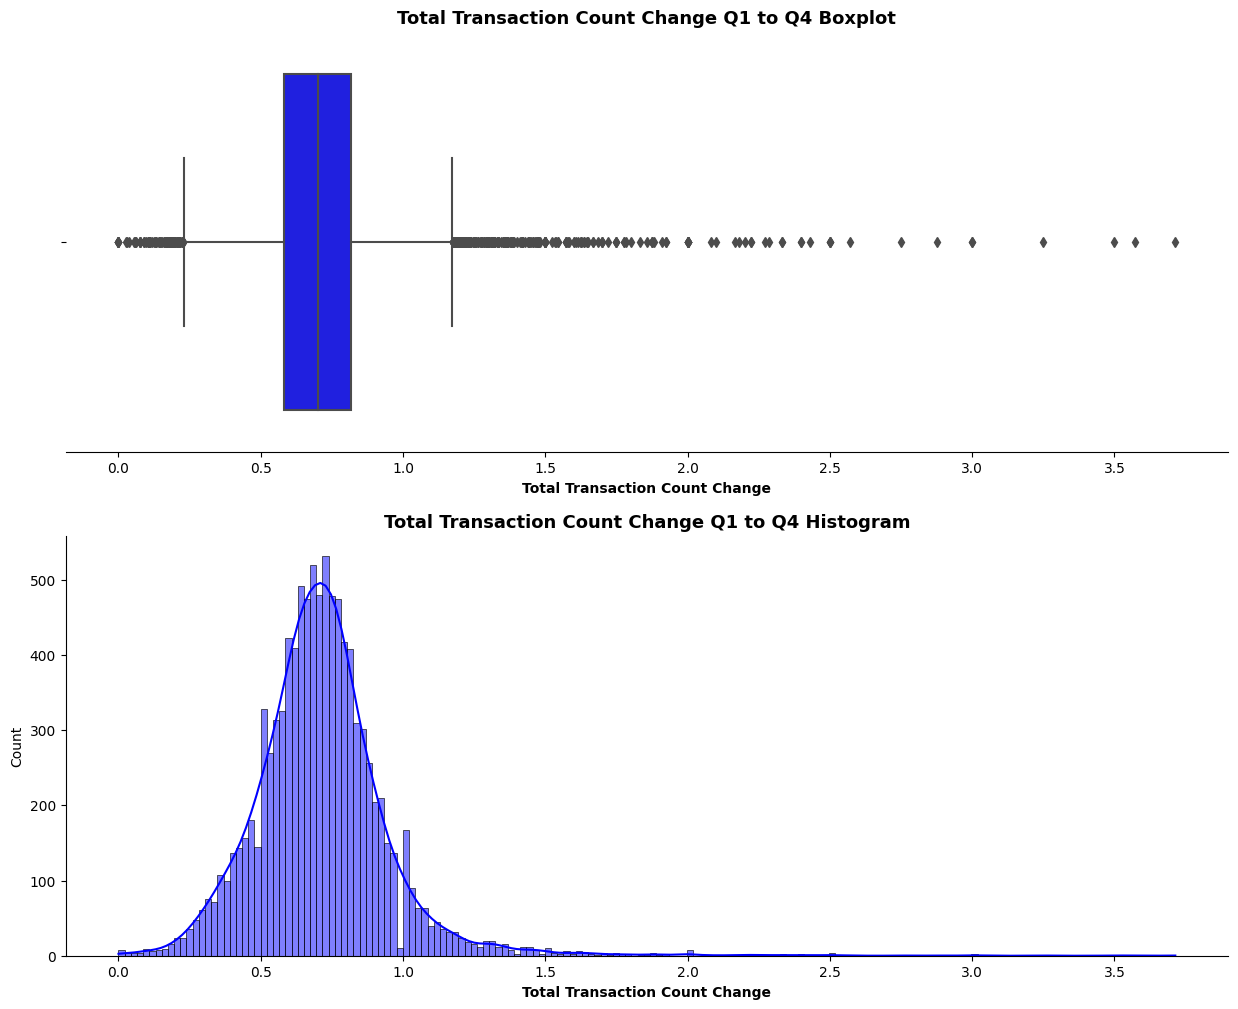

In [66]:
fig, ax = plt.subplots(2, 1, figsize=(15,12))

ax = sns.boxplot(x="total_ct_chng_q4_q1",
            data=combo_df, 
            color="blue",
            ax=ax[0])

ax.set_title('Total Transaction Count Change Q1 to Q4 Boxplot', fontdict={'size': 13, 'weight': 'semibold'})

ax.set_xlabel('Total Transaction Count Change', 
               fontweight ='bold')

ax.spines['top'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.spines['right'].set_visible(False)

ax1 = sns.histplot(x = "total_ct_chng_q4_q1",
                  data=combo_df,
                  kde=True,
                  color="blue")
ax1.set_title('Total Transaction Count Change Q1 to Q4 Histogram', fontdict={'size': 13, 'weight': 'semibold'})
ax1.set_xlabel('Total Transaction Count Change', 
               fontweight ='bold')
ax1.spines['top'].set_visible(False)
ax1.spines['right'].set_visible(False)

> This column is measuring the change in transaction counts between Q1 and Q4. It's categorizing larger values as outliers, however, we know the data includes both existing customers and those who have left the bank. I wonder if we look at these values in that context, if we'd have a better understanding. 

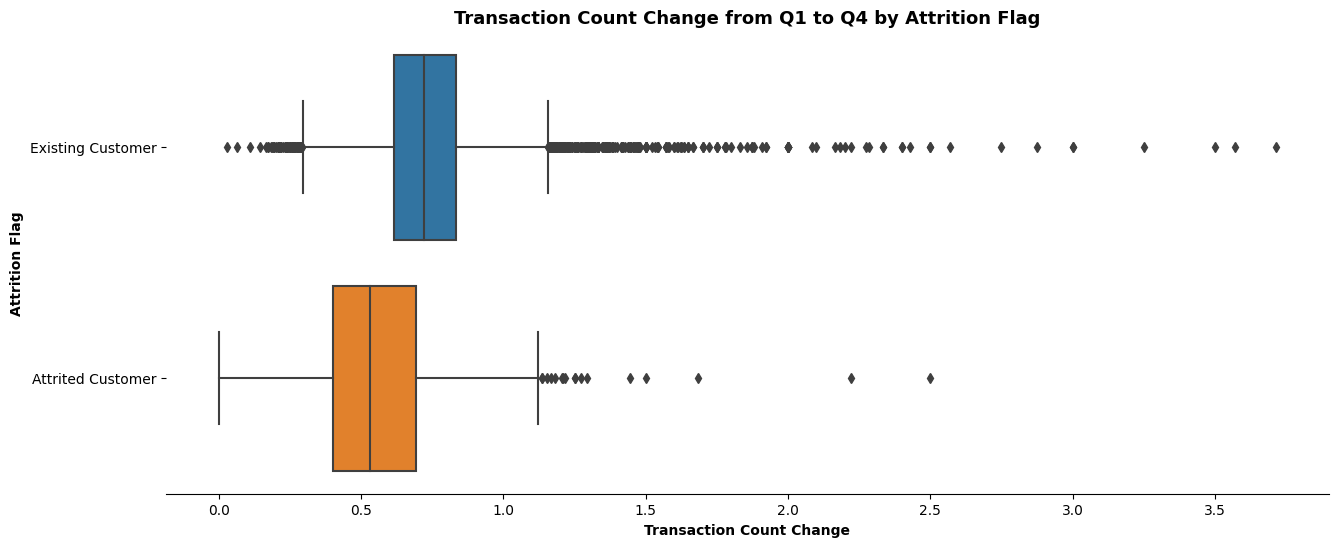

In [70]:
fig, ax = plt.subplots(figsize=(15,6))

ax = sns.boxplot(x="total_ct_chng_q4_q1",
            y="attrition_flag",
            data=combo_df)

ax.set_title('Transaction Count Change from Q1 to Q4 by Attrition Flag', fontdict={'size': 13, 'weight': 'semibold'})

ax.set_xlabel('Transaction Count Change', 
               fontweight ='bold')

ax.set_ylabel('Attrition Flag', 
               fontweight = 'bold')

ax.spines['top'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.spines['right'].set_visible(False)

> Here we can see that the outliers largely fall to existing customers. It's entirely plausible that a customer had more transaction counts from one quarter to another and, therefore, there is not reason to remove this data. 

### 14. total_trans_ct

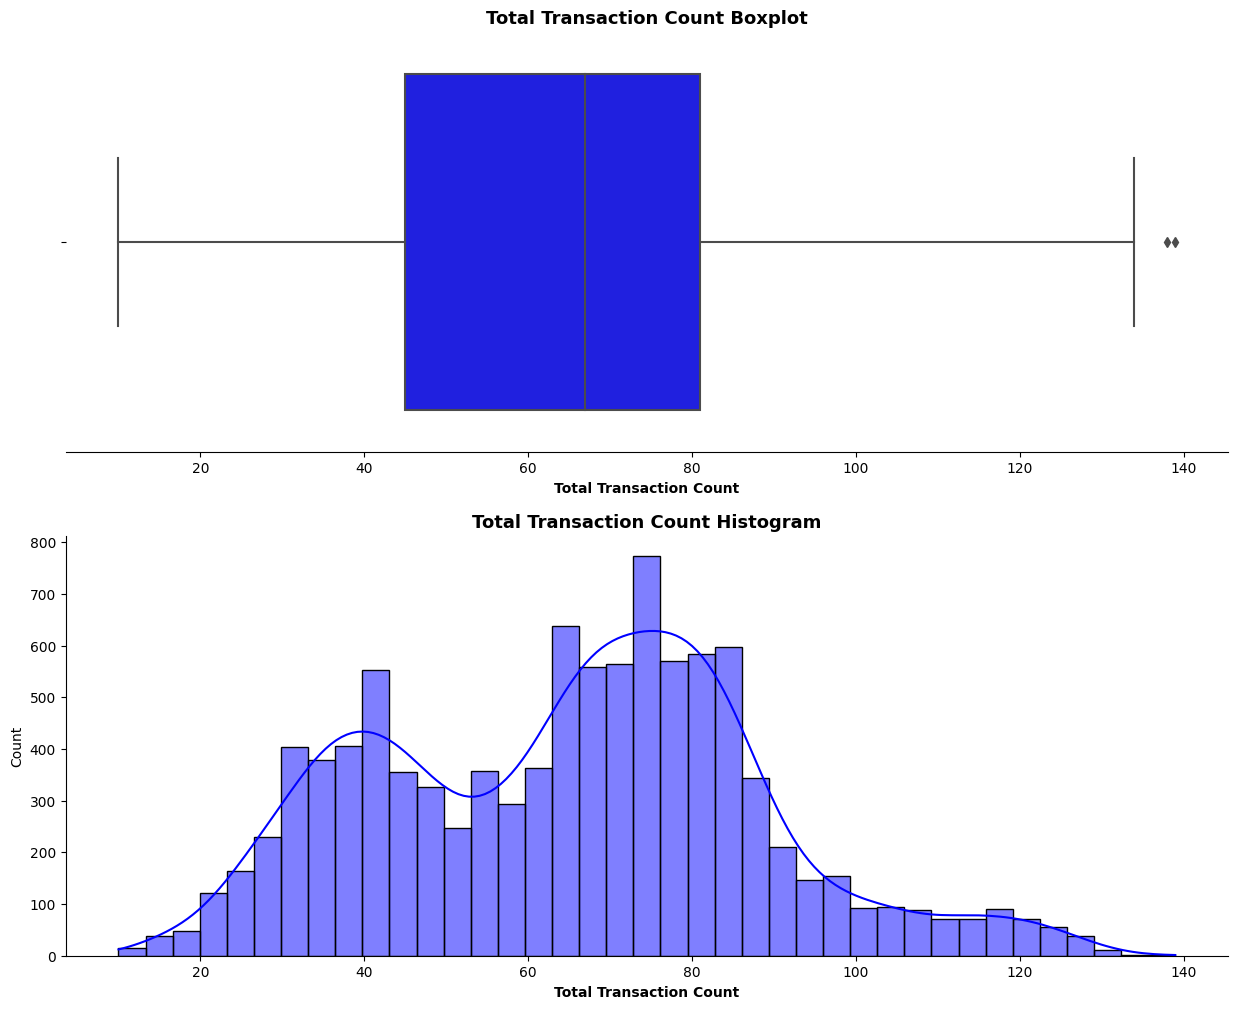

In [69]:
fig, ax = plt.subplots(2, 1, figsize=(15,12))

ax = sns.boxplot(x="total_trans_ct",
            data=combo_df, 
            color="blue",
            ax=ax[0])

ax.set_title('Total Transaction Count Boxplot', fontdict={'size': 13, 'weight': 'semibold'})

ax.set_xlabel('Total Transaction Count', 
               fontweight ='bold')

ax.spines['top'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.spines['right'].set_visible(False)

ax1 = sns.histplot(x = "total_trans_ct",
                  data=combo_df,
                  kde=True,
                  color="blue")
ax1.set_title('Total Transaction Count Histogram', fontdict={'size': 13, 'weight': 'semibold'})
ax1.set_xlabel('Total Transaction Count', 
               fontweight ='bold')
ax1.spines['top'].set_visible(False)
ax1.spines['right'].set_visible(False)

> We looked at these values in relation to total transaction amounts and have decided to leave them in as there is a relational correlation.

## Outlier Detection Summary

Columns with outliers: 
- months_on_book (The outliers in this column fit in with the overall distribution) 
- months_inactive_12_mon (Most customers are inactive for 1-3 month, however, no reason to remove)
- contacts_count_12_mon (Most customers have 1-3 contacts, however, no reason to remove)
- credit_limit (Strongly correlated to avg_open_to_buy)
- avg_open_to_buy (Strongly correlated to credit_limit)
- customer_age (Two customers above 68, however, no reason to remove) 
- total_amt_chng_q4_q1 (Most outliers belong to existing customers & data makes contextual sense)
- total_trans_amt (Correlated to total_trans_ct)
- total_ct_chng_q4_q1 (Most outliers belong to existing customers & data makes contextual sense)
- total_trans_ct (Correlated to total_trans_amt)

While a number of the columns had outliers, we've decided to leave them in. Through our analysis of columns contextually or in relation to other values, we found the values made sense to leave in or that there was no reason to remove them.  

## Data Cleaning

> The data is largely very clean. There were only a few things to clean. 
- There are unknown values in the data
- Clientnum column need updated datatype

In [22]:
# Creating a copy of the dataframe before cleaning

clean_df = combo_df.copy()

In [9]:
#making sure it worked

clean_df.sample(3)

clientnum     attrition_flag  ...  total_trans_ct age_group
8564  709134333  Existing Customer  ...              67   40 - 49
6351  713620308  Existing Customer  ...              34   40 - 49
5794  718806783  Attrited Customer  ...              41   40 - 49

[3 rows x 22 columns]

> Updating datatypes for clientnum (should not be a numerical datatype because it is the unique identifier for our dataframe)

In [23]:
# Define: Changing columns dtype in accordance with my assessment

dtype= {
        'clientnum': 'object'
       }

clean_df = clean_df.astype(dtype)

In [13]:
#Checking to make sure it worked
clean_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10127 entries, 0 to 10126
Data columns (total 22 columns):
 #   Column                    Non-Null Count  Dtype   
---  ------                    --------------  -----   
 0   clientnum                 10127 non-null  object  
 1   attrition_flag            10127 non-null  object  
 2   dependent_count           10127 non-null  int64   
 3   card_category             10127 non-null  object  
 4   months_on_book            10127 non-null  int64   
 5   months_inactive_12_mon    10127 non-null  int64   
 6   contacts_count_12_mon     10127 non-null  int64   
 7   credit_limit              10127 non-null  float64 
 8   avg_open_to_buy           10127 non-null  float64 
 9   avg_utilization_ratio     10127 non-null  float64 
 10  customer_age              10127 non-null  int64   
 11  gender                    10127 non-null  object  
 12  education_level           10127 non-null  object  
 13  marital_status            10127 non-null  obje

> Let's first find all unknown values in the data

In [24]:
clean_df[clean_df.eq("Unknown").any(1)]

clientnum     attrition_flag  ...  total_trans_ct        age_group
1      804424383  Existing Customer  ...              40        60 and up
2      708300483  Attrited Customer  ...              16        60 and up
3      808284783  Existing Customer  ...              44        60 and up
4      712720158  Existing Customer  ...              32        60 and up
9      822969858  Existing Customer  ...              31        60 and up
...          ...                ...  ...             ...              ...
10115  712407033  Existing Customer  ...              59  younger than 30
10117  715742658  Existing Customer  ...              97          40 - 49
10119  711863433  Existing Customer  ...             116          30 - 39
10120  779422458  Existing Customer  ...             120          30 - 39
10121  711663858  Existing Customer  ...             127  younger than 30

[3046 rows x 22 columns]

> Since there is only 91 rows that have unkown values, let's remove them

In [28]:
clean_df = clean_df[(clean_df.marital_status != "Unknown")]
clean_df = clean_df[(clean_df.education_level != "Unknown")]
clean_df = clean_df[(clean_df.income_category != "Unknown")]

In [30]:
# Making sure it worked! 
clean_df[clean_df.eq("Unknown").any(1)]

Empty DataFrame
Columns: [clientnum, attrition_flag, dependent_count, card_category, months_on_book, months_inactive_12_mon, contacts_count_12_mon, credit_limit, avg_open_to_buy, avg_utilization_ratio, customer_age, gender, education_level, marital_status, income_category, total_relationship_count, total_revolving_bal, total_amt_chng_q4_q1, total_trans_amt, total_ct_chng_q4_q1, total_trans_ct, age_group]
Index: []

In [29]:
clean_df.sample(4)

clientnum     attrition_flag  ...  total_trans_ct age_group
2588  717466158  Existing Customer  ...              62   40 - 49
4702  714031983  Existing Customer  ...              63   40 - 49
2262  789244308  Existing Customer  ...              64   50 - 59
6273  716464533  Existing Customer  ...             116   30 - 39

[4 rows x 22 columns]

> Wonderful! Now I can start the exploratory data analysis! 

## Analysis & Visualizations

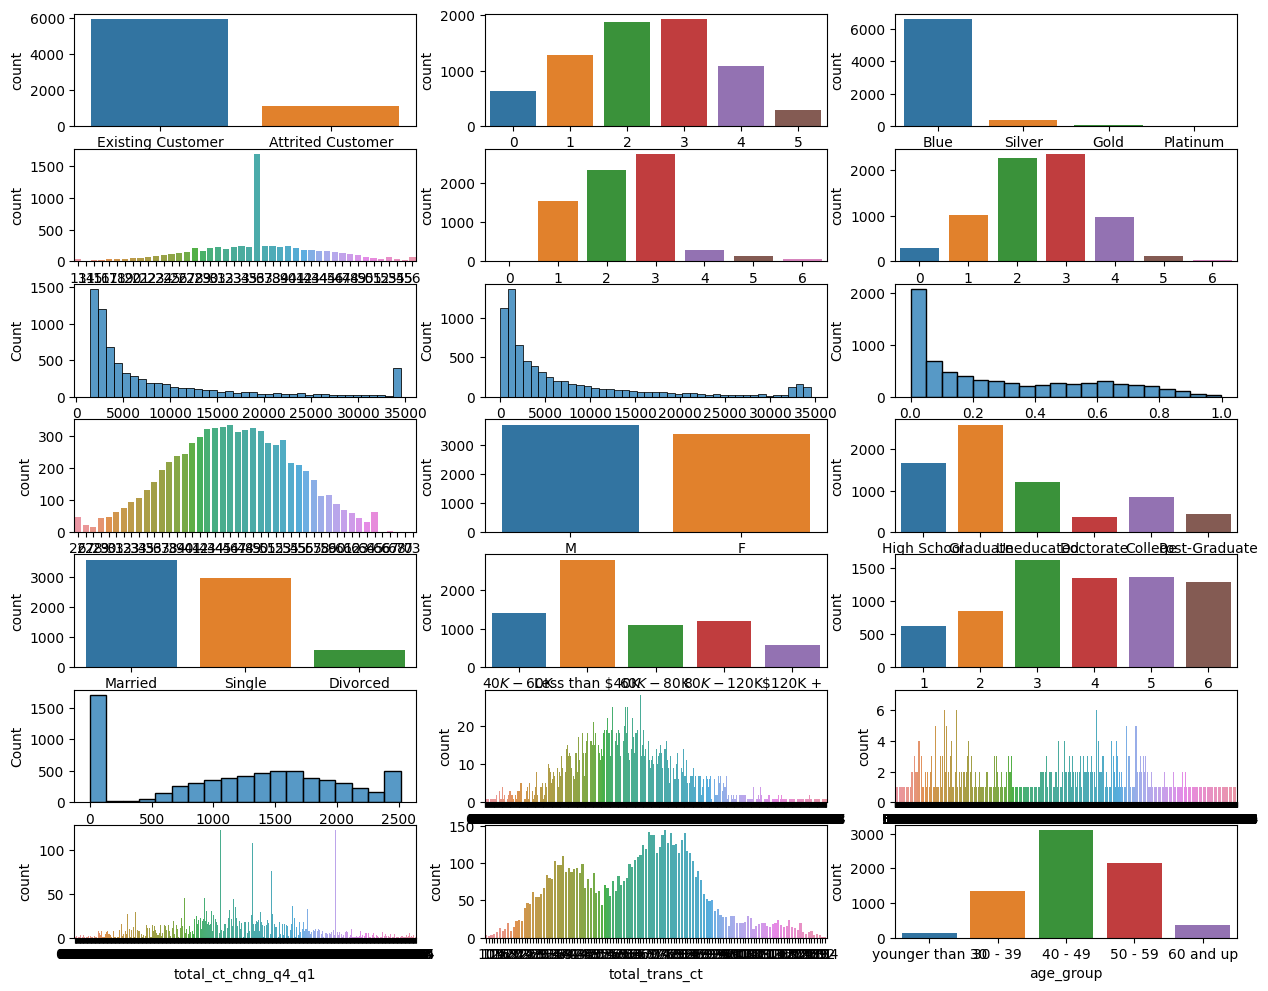

In [53]:
fig, axes = plt.subplots(7, 3, figsize=(15,12))
    
ax = sns.countplot(x="attrition_flag", data=clean_df, ax=axes[0,0])
ax1 = sns.countplot(x="dependent_count", data=clean_df, ax=axes[0,1])
ax2 = sns.countplot(x="card_category", data=clean_df, ax=axes[0,2])
ax3 = sns.countplot(x="months_on_book", data=clean_df, ax=axes[1,0])
ax4 = sns.countplot(x="months_inactive_12_mon", data=clean_df, ax=axes[1,1])
ax5 = sns.countplot(x="contacts_count_12_mon", data=clean_df, ax=axes[1,2])
ax6 = sns.histplot(x="credit_limit", data=clean_df, ax=axes[2,0])
ax7 = sns.histplot(x="avg_open_to_buy", data=clean_df, ax=axes[2,1])
ax8 = sns.histplot(x="avg_utilization_ratio", data=clean_df, ax=axes[2,2])
ax9 = sns.countplot(x="customer_age", data=clean_df, ax=axes[3,0])
ax10 = sns.countplot(x="gender", data=clean_df, ax=axes[3,1])
ax11 = sns.countplot(x="education_level", data=clean_df, ax=axes[3,2])
ax12 = sns.countplot(x="marital_status", data=clean_df, ax=axes[4,0])
ax13 = sns.countplot(x="income_category", data=clean_df, ax=axes[4,1])
ax14 = sns.countplot(x="total_relationship_count", data=clean_df, ax=axes[4,2])
ax15 = sns.histplot(x="total_revolving_bal", data=clean_df, ax=axes[5,0])
ax16 = sns.countplot(x="total_amt_chng_q4_q1", data=clean_df, ax=axes[5,1])
ax17 = sns.countplot(x="total_trans_amt", data=clean_df, ax=axes[5,2])
ax18 = sns.countplot(x="total_ct_chng_q4_q1", data=clean_df, ax=axes[6,0])
ax19 = sns.countplot(x="total_trans_ct", data=clean_df, ax=axes[6,1])
ax20 = sns.countplot(x="age_group", data=clean_df, ax=axes[6,2])

> Okay, let's explore attrition_flag a little more closely so we can calculate churn rate.

In [62]:
churn_rate = clean_df['attrition_flag'].value_counts()/clean_df['attrition_flag'].count()*100
churn_rate

Existing Customer    84.281881
Attrited Customer    15.718119
Name: attrition_flag, dtype: float64

Text(0.5, 0, '')

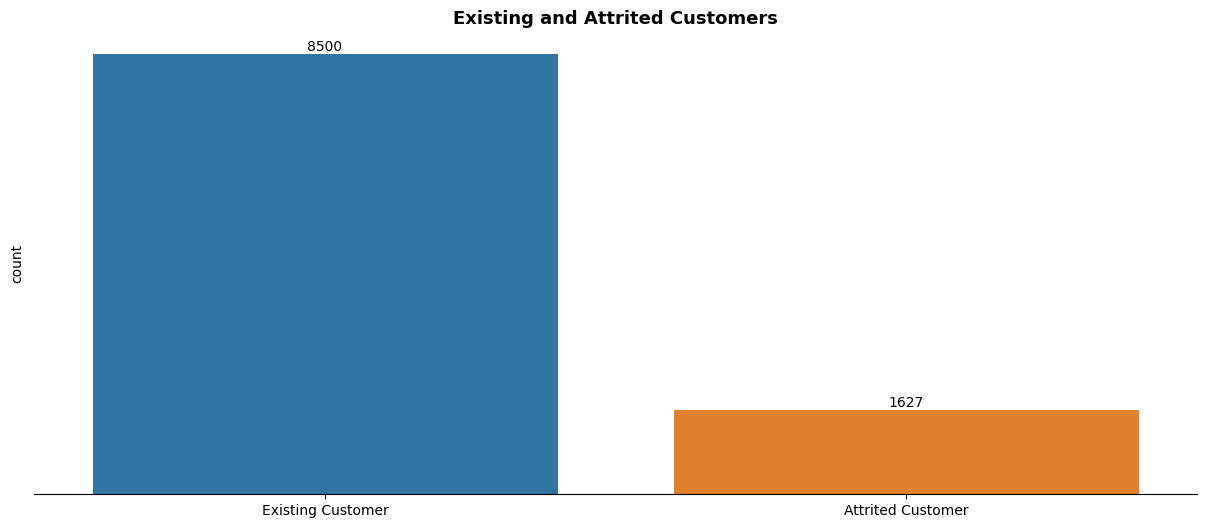

In [66]:
fig, ax = plt.subplots(figsize=(15,6))

ax = sns.countplot(x="attrition_flag",
            data=combo_df)
ax.bar_label(ax.containers[0])
ax.set_title('Existing and Attrited Customers', fontdict={'size': 13, 'weight': 'semibold'})

ax.spines['top'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.spines['right'].set_visible(False)
plt.yticks([])
plt.xlabel('')

> Let's focus on finding differences between existing and attrited customers 

In [69]:
exist_df = clean_df[clean_df.attrition_flag == "Existing Customer"]
attr_df = clean_df[clean_df.attrition_flag == "Attrited Customer"]

In [71]:
# Checking to make sure it worked
exist_df.sample(4)

clientnum     attrition_flag  ...  total_trans_ct age_group
7072  710077008  Existing Customer  ...              74   40 - 49
6592  825838908  Existing Customer  ...              92   30 - 39
1405  708103608  Existing Customer  ...             128   50 - 59
1541  708390633  Existing Customer  ...              69   50 - 59

[4 rows x 22 columns]

Text(0.5, 1.0, 'Gender of Attrited Customers')

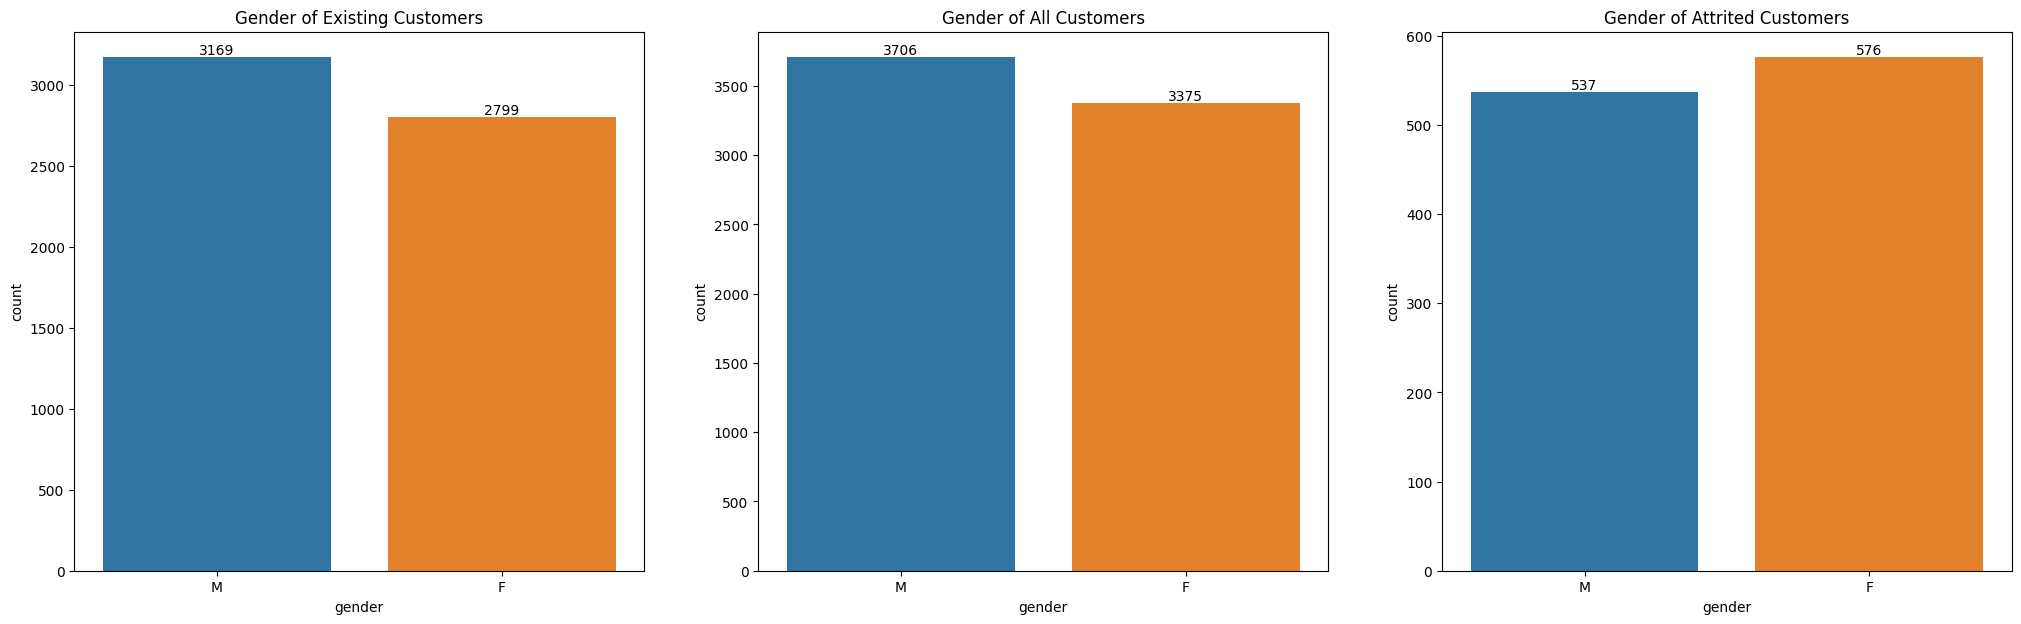

In [89]:
fig, axes = plt.subplots(1, 3, figsize=(25,7))
    
ax = sns.countplot(x="gender", data=exist_df, ax=axes[0])
ax1 = sns.countplot(x="gender", data=clean_df, ax=axes[1])
ax2 = sns.countplot(x="gender", data=attr_df, ax=axes[2])
for i in ax.containers:
    ax.bar_label(i,);
for i in ax1.containers:
    ax1.bar_label(i,);
for i in ax2.containers:
    ax2.bar_label(i, );                
axes[0].set_title('Gender of Existing Customers')
axes[1].set_title('Gender of All Customers')
axes[2].set_title('Gender of Attrited Customers')

Text(0.5, 1.0, 'Education Level of Attrited Customers')

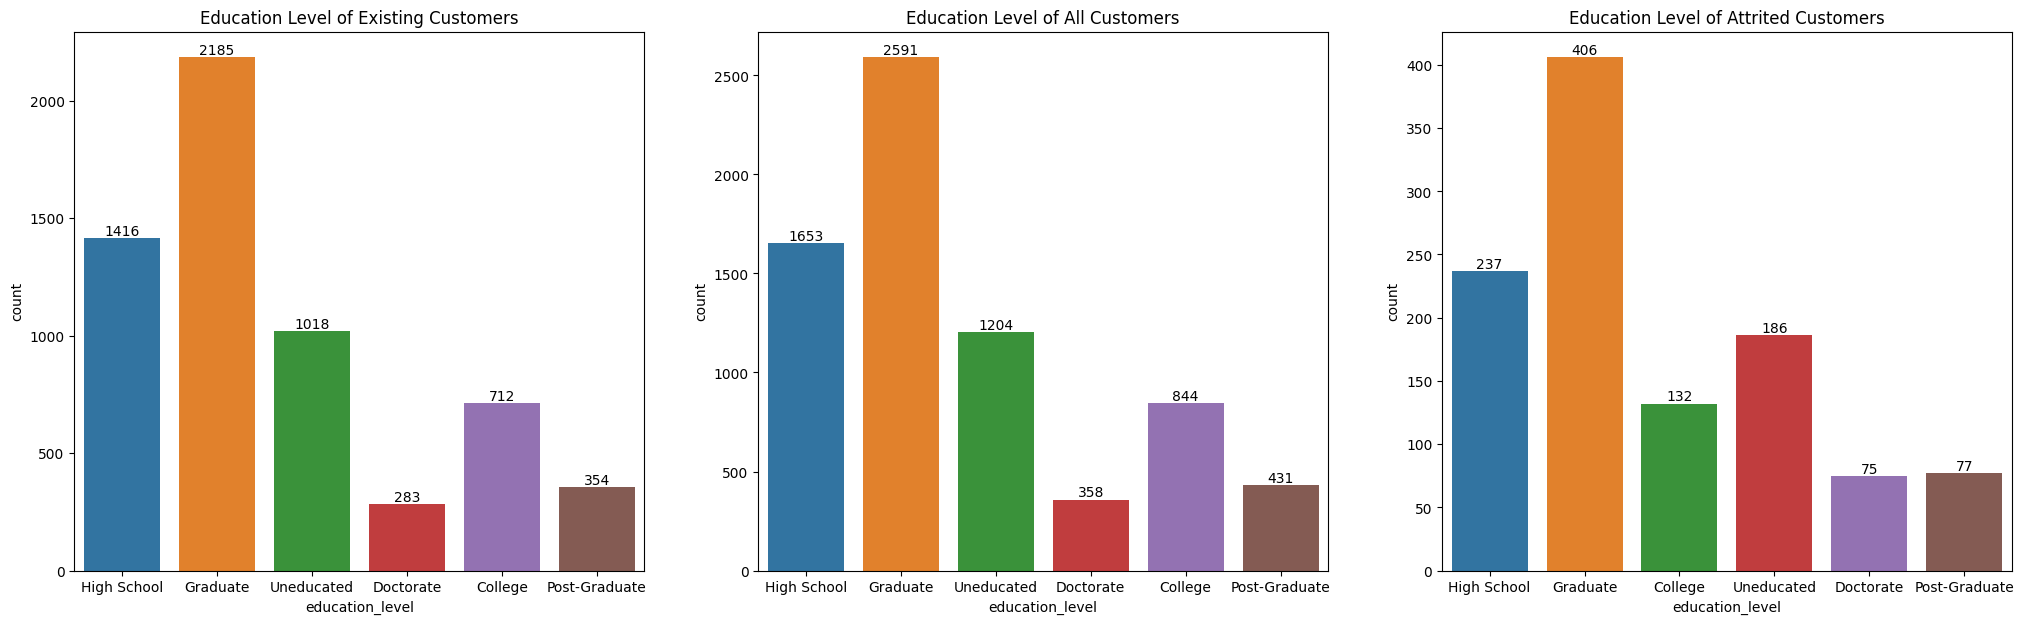

In [96]:
fig, axes = plt.subplots(1, 3, figsize=(25,7))

ax3 = sns.countplot(x="education_level", data=exist_df, ax=axes[0])
ax4 = sns.countplot(x="education_level", data=clean_df, ax=axes[1])
ax5 = sns.countplot(x="education_level", data=attr_df, ax=axes[2])
for i in ax3.containers:
    ax3.bar_label(i,);
for i in ax4.containers:
    ax4.bar_label(i,);
for i in ax5.containers:
    ax5.bar_label(i, );                
axes[0].set_title('Education Level of Existing Customers')
axes[1].set_title('Education Level of All Customers')
axes[2].set_title('Education Level of Attrited Customers')


Text(0.5, 1.0, 'Marital Status of Attrited Customers')

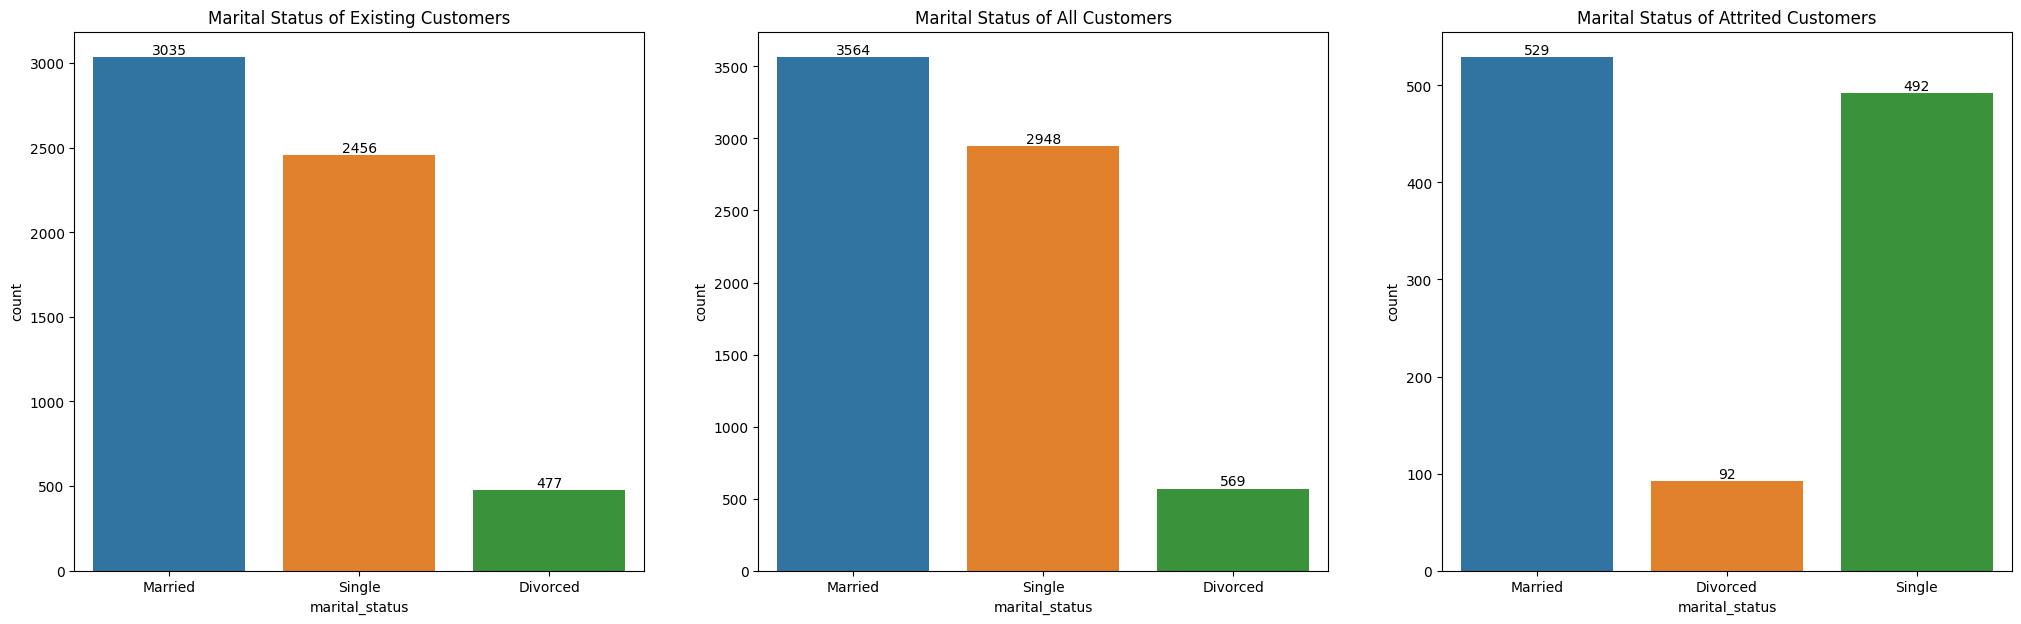

In [90]:
fig, axes = plt.subplots(1, 3, figsize=(25,7))
    
ax = sns.countplot(x="marital_status", data=exist_df, ax=axes[0])
ax1 = sns.countplot(x="marital_status", data=clean_df, ax=axes[1])
ax2 = sns.countplot(x="marital_status", data=attr_df, ax=axes[2])
for i in ax.containers:
    ax.bar_label(i,);
for i in ax1.containers:
    ax1.bar_label(i,);
for i in ax2.containers:
    ax2.bar_label(i, );                
axes[0].set_title('Marital Status of Existing Customers')
axes[1].set_title('Marital Status of All Customers')
axes[2].set_title('Marital Status of Attrited Customers')

Text(0.5, 1.0, 'Income Category of Attrited Customers')

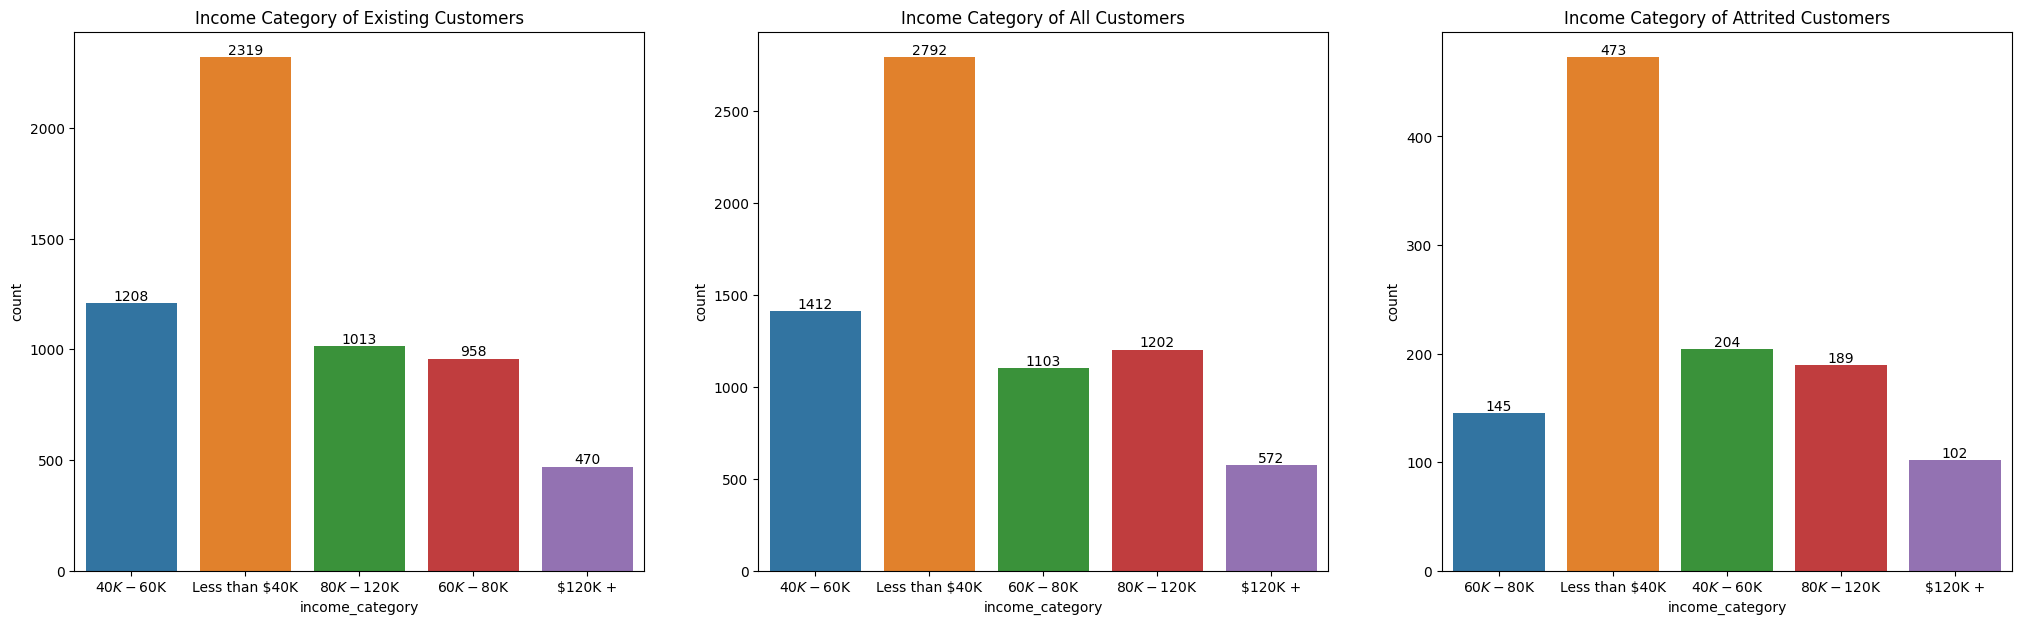

In [91]:
fig, axes = plt.subplots(1, 3, figsize=(25,7))
    
ax = sns.countplot(x="income_category", data=exist_df, ax=axes[0])
ax1 = sns.countplot(x="income_category", data=clean_df, ax=axes[1])
ax2 = sns.countplot(x="income_category", data=attr_df, ax=axes[2])
for i in ax.containers:
    ax.bar_label(i,);
for i in ax1.containers:
    ax1.bar_label(i,);
for i in ax2.containers:
    ax2.bar_label(i, );                
axes[0].set_title('Income Category of Existing Customers')
axes[1].set_title('Income Category of All Customers')
axes[2].set_title('Income Category of Attrited Customers')

Text(0.5, 1.0, 'Total Relationship Count of Attrited Customers')

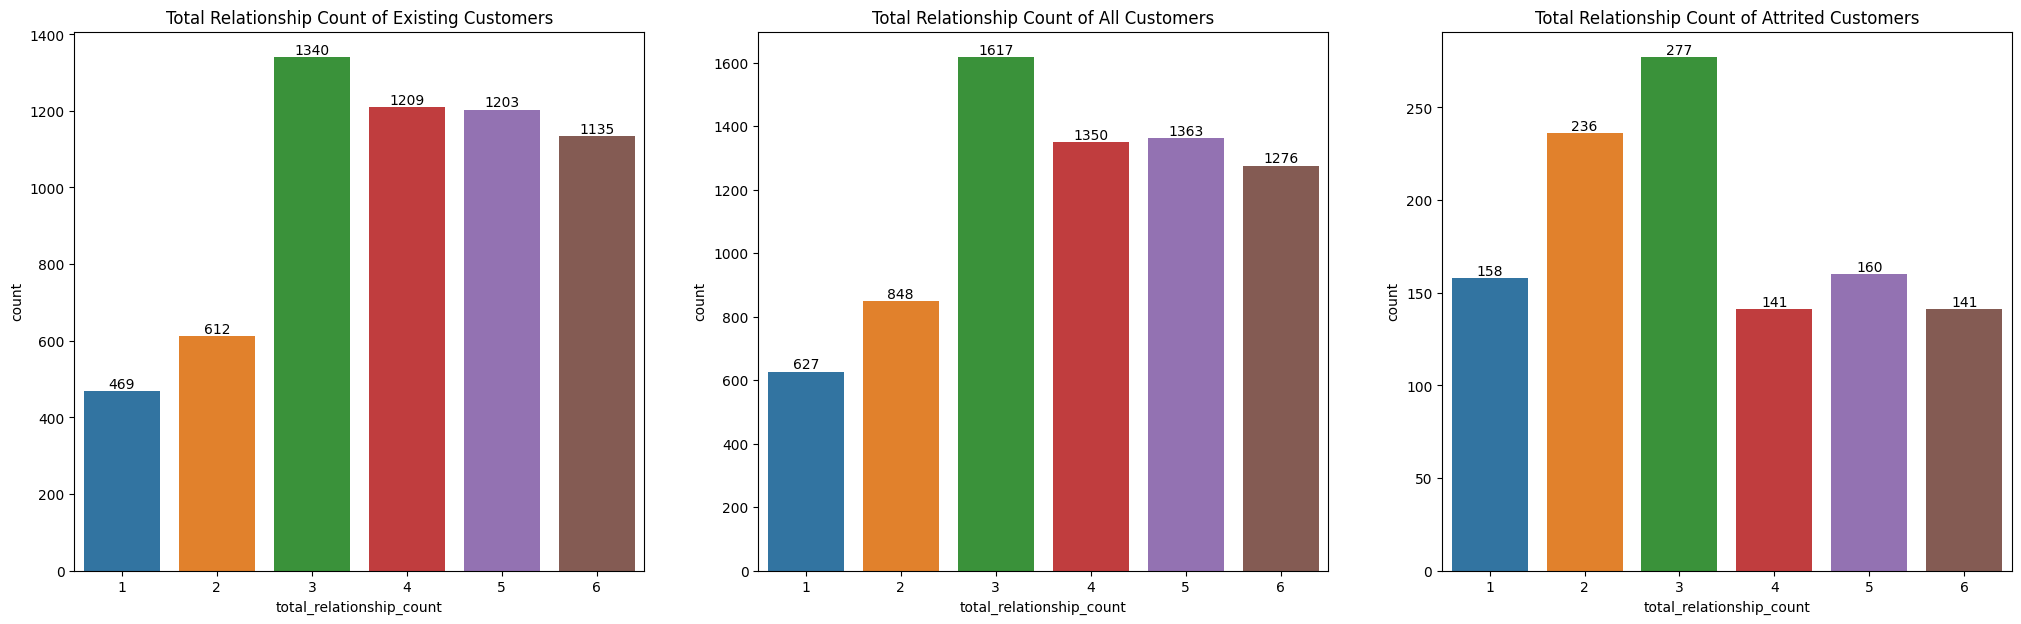

In [94]:
fig, axes = plt.subplots(1, 3, figsize=(25,7))
    
ax = sns.countplot(x="total_relationship_count", data=exist_df, ax=axes[0])
ax1 = sns.countplot(x="total_relationship_count", data=clean_df, ax=axes[1])
ax2 = sns.countplot(x="total_relationship_count", data=attr_df, ax=axes[2])
for i in ax.containers:
    ax.bar_label(i,);
for i in ax1.containers:
    ax1.bar_label(i,);
for i in ax2.containers:
    ax2.bar_label(i, );                
axes[0].set_title('Total Relationship Count of Existing Customers')
axes[1].set_title('Total Relationship Count of All Customers')
axes[2].set_title('Total Relationship Count of Attrited Customers')

Text(0.5, 1.0, 'Age Groups of Attrited Customers')

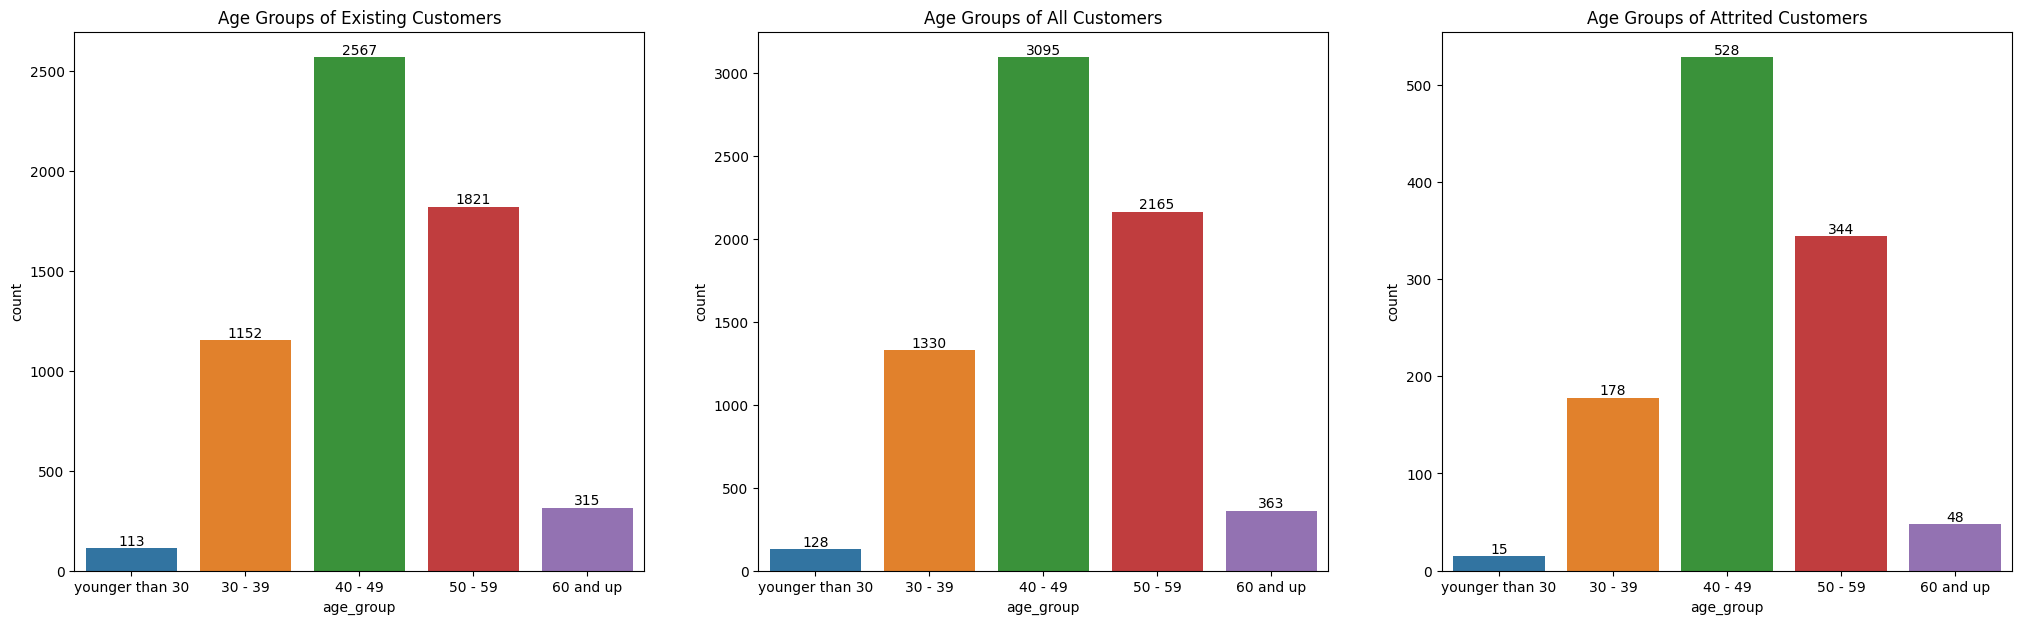

In [97]:
fig, axes = plt.subplots(1, 3, figsize=(25,7))
    
ax = sns.countplot(x="age_group", data=exist_df, ax=axes[0])
ax1 = sns.countplot(x="age_group", data=clean_df, ax=axes[1])
ax2 = sns.countplot(x="age_group", data=attr_df, ax=axes[2])
for i in ax.containers:
    ax.bar_label(i,);
for i in ax1.containers:
    ax1.bar_label(i,);
for i in ax2.containers:
    ax2.bar_label(i, );                
axes[0].set_title('Age Groups of Existing Customers')
axes[1].set_title('Age Groups of All Customers')
axes[2].set_title('Age Groups of Attrited Customers')

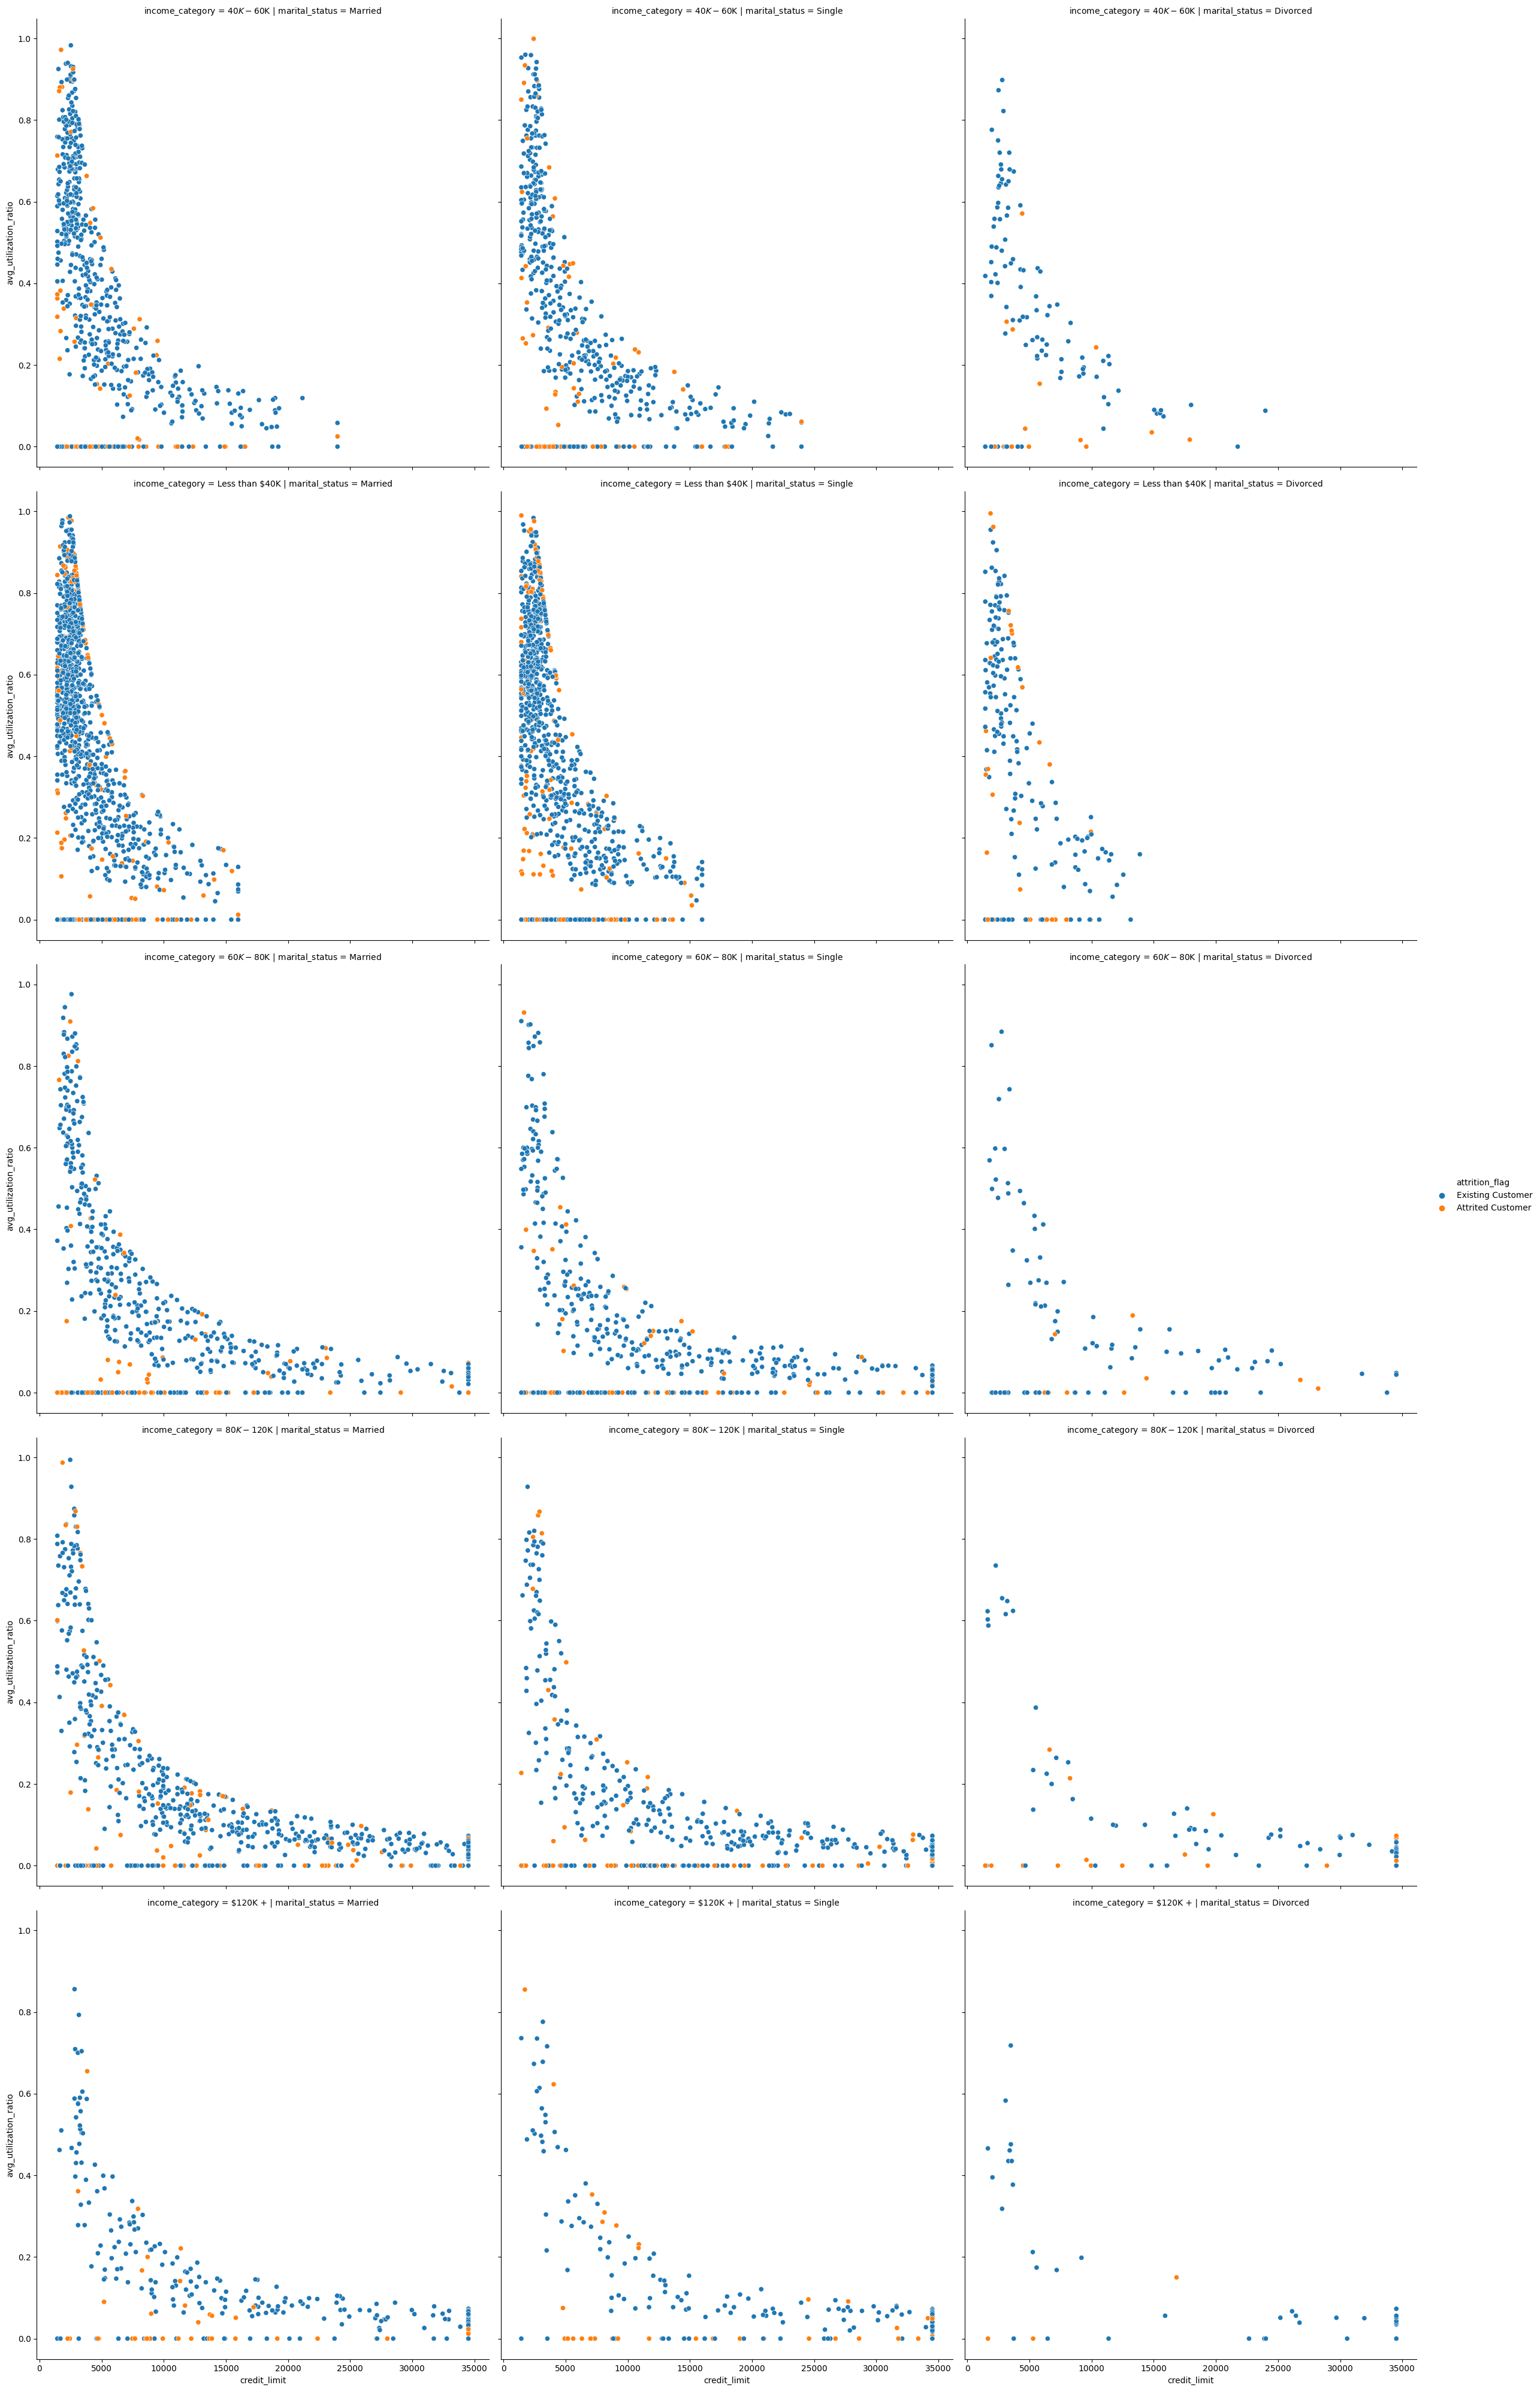

In [102]:
sns.relplot(data = clean_df, y="avg_utilization_ratio", x="credit_limit",
           row="income_category",
           col="marital_status", 
           hue="attrition_flag",
           height=8)

(array([ 0.5,  1.5,  2.5,  3.5,  4.5,  5.5,  6.5,  7.5,  8.5,  9.5, 10.5,
        11.5, 12.5, 13.5]),
 [Text(0.5, 0, 'dependent_count'),
  Text(1.5, 0, 'months_on_book'),
  Text(2.5, 0, 'months_inactive_12_mon'),
  Text(3.5, 0, 'contacts_count_12_mon'),
  Text(4.5, 0, 'credit_limit'),
  Text(5.5, 0, 'avg_open_to_buy'),
  Text(6.5, 0, 'avg_utilization_ratio'),
  Text(7.5, 0, 'customer_age'),
  Text(8.5, 0, 'total_relationship_count'),
  Text(9.5, 0, 'total_revolving_bal'),
  Text(10.5, 0, 'total_amt_chng_q4_q1'),
  Text(11.5, 0, 'total_trans_amt'),
  Text(12.5, 0, 'total_ct_chng_q4_q1'),
  Text(13.5, 0, 'total_trans_ct')])

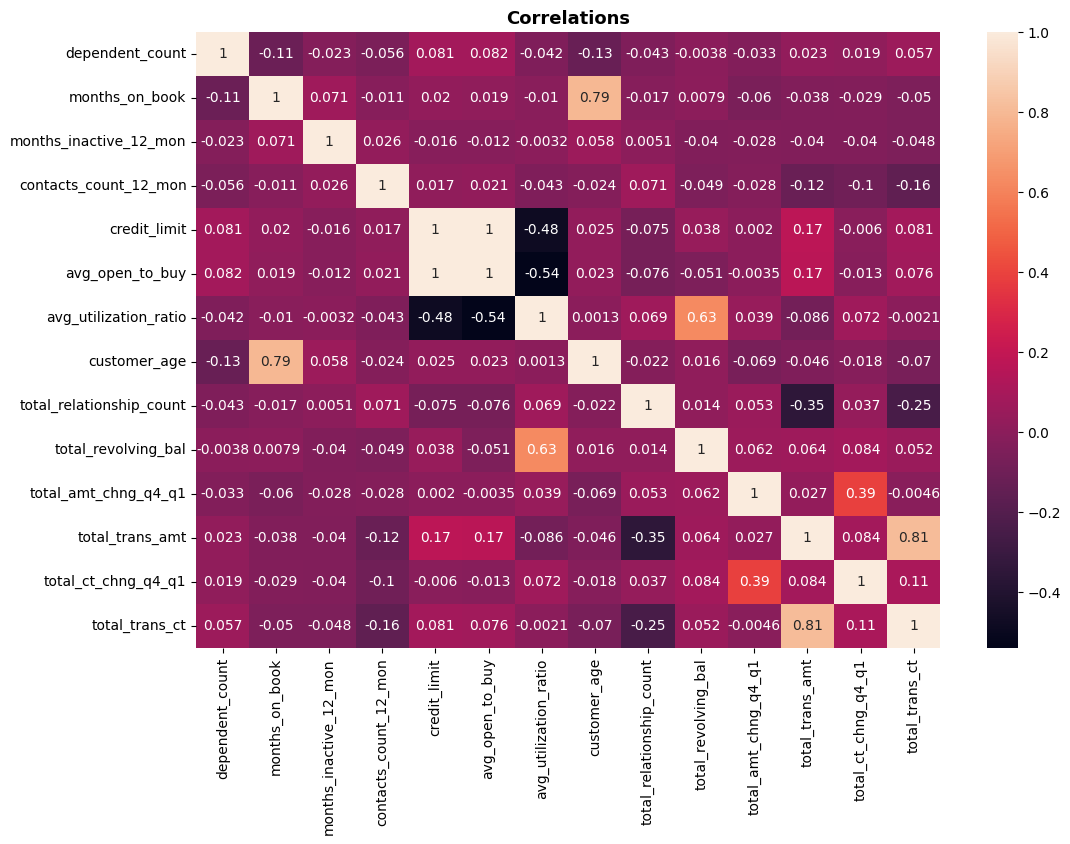

In [111]:
number_columns = clean_df.select_dtypes(include=[int,float]).columns.tolist()
plt.figure(figsize = [12, 8])
ax = sns.heatmap(clean_df[number_columns].corr(), 
           annot = True)
ax.set_title('Correlations', fontdict={'size': 13, 'weight': 'semibold'})
plt.xticks(rotation = 90)

> We see positive correlations between:
-  a customer's age and the months on book
-  average utilzation ratio and total revolving balance
-  total transaction count and total transaction amount

# Answering Specific Questions

### 1. What do the bank's churned customers look like? 

Text(0.5, 1.0, 'Age Groups of Attrited Customers')

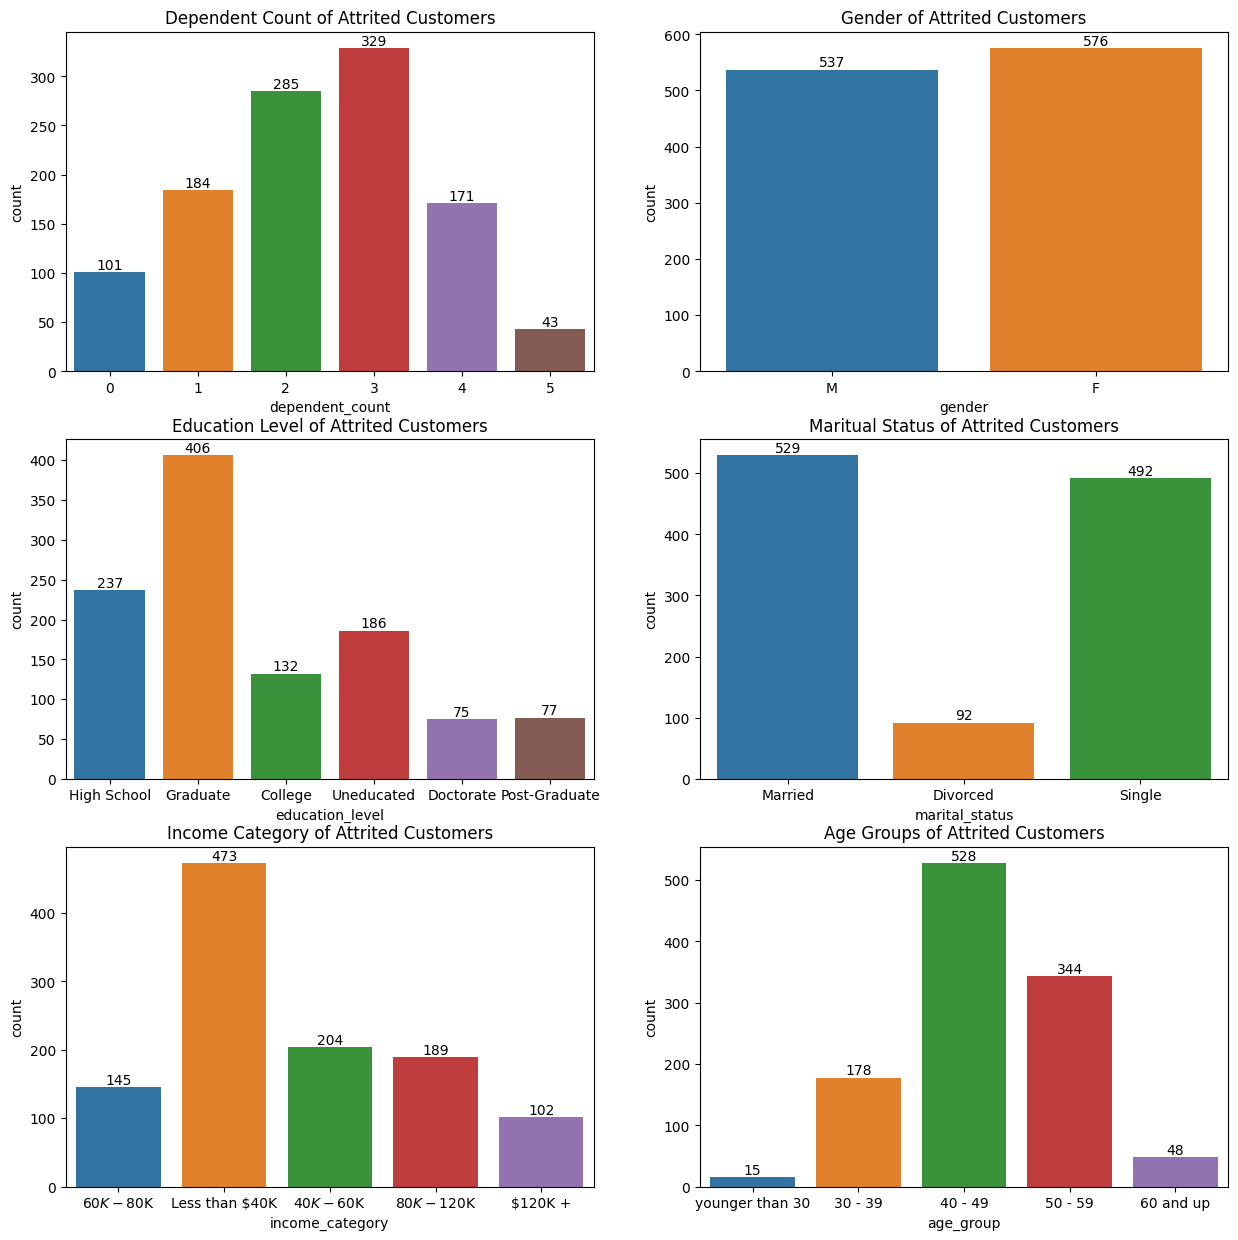

In [118]:
fig, axes = plt.subplots(3, 2, figsize=(15,15))
    
ax = sns.countplot(x="dependent_count", data=attr_df, ax=axes[0,0])
ax1 = sns.countplot(x="gender", data=attr_df, ax=axes[0,1])
ax2 = sns.countplot(x="education_level", data=attr_df, ax=axes[1,0])
ax3 = sns.countplot(x="marital_status", data=attr_df, ax=axes[1,1])
ax4 = sns.countplot(x="income_category", data=attr_df, ax=axes[2,0])
ax5 = sns.countplot(x="age_group", data=attr_df, ax=axes[2,1])
for i in ax.containers:
    ax.bar_label(i,);
for i in ax1.containers:
    ax1.bar_label(i,);
for i in ax2.containers:
    ax2.bar_label(i, );  
for i in ax3.containers:
    ax3.bar_label(i,);
for i in ax4.containers:
    ax4.bar_label(i,);
for i in ax5.containers:
    ax5.bar_label(i, );
axes[0,0].set_title('Dependent Count of Attrited Customers')
axes[0,1].set_title('Gender of Attrited Customers')
axes[1,0].set_title('Education Level of Attrited Customers')
axes[1,1].set_title('Maritual Status of Attrited Customers')
axes[2,0].set_title('Income Category of Attrited Customers')
axes[2,1].set_title('Age Groups of Attrited Customers')

> Okay! Just over half of churned customers are women, most have 2-3 dependents, and nearly half fall within the 40-49 age group. The vast majority are married or single, with 40% making less than 40k and most with a graduate degree or below. 

### 2. What does a churned customer's relationship with the bank look like? 

Text(0.5, 1.0, 'Average Utilzation Ratio of Attrited Customers')

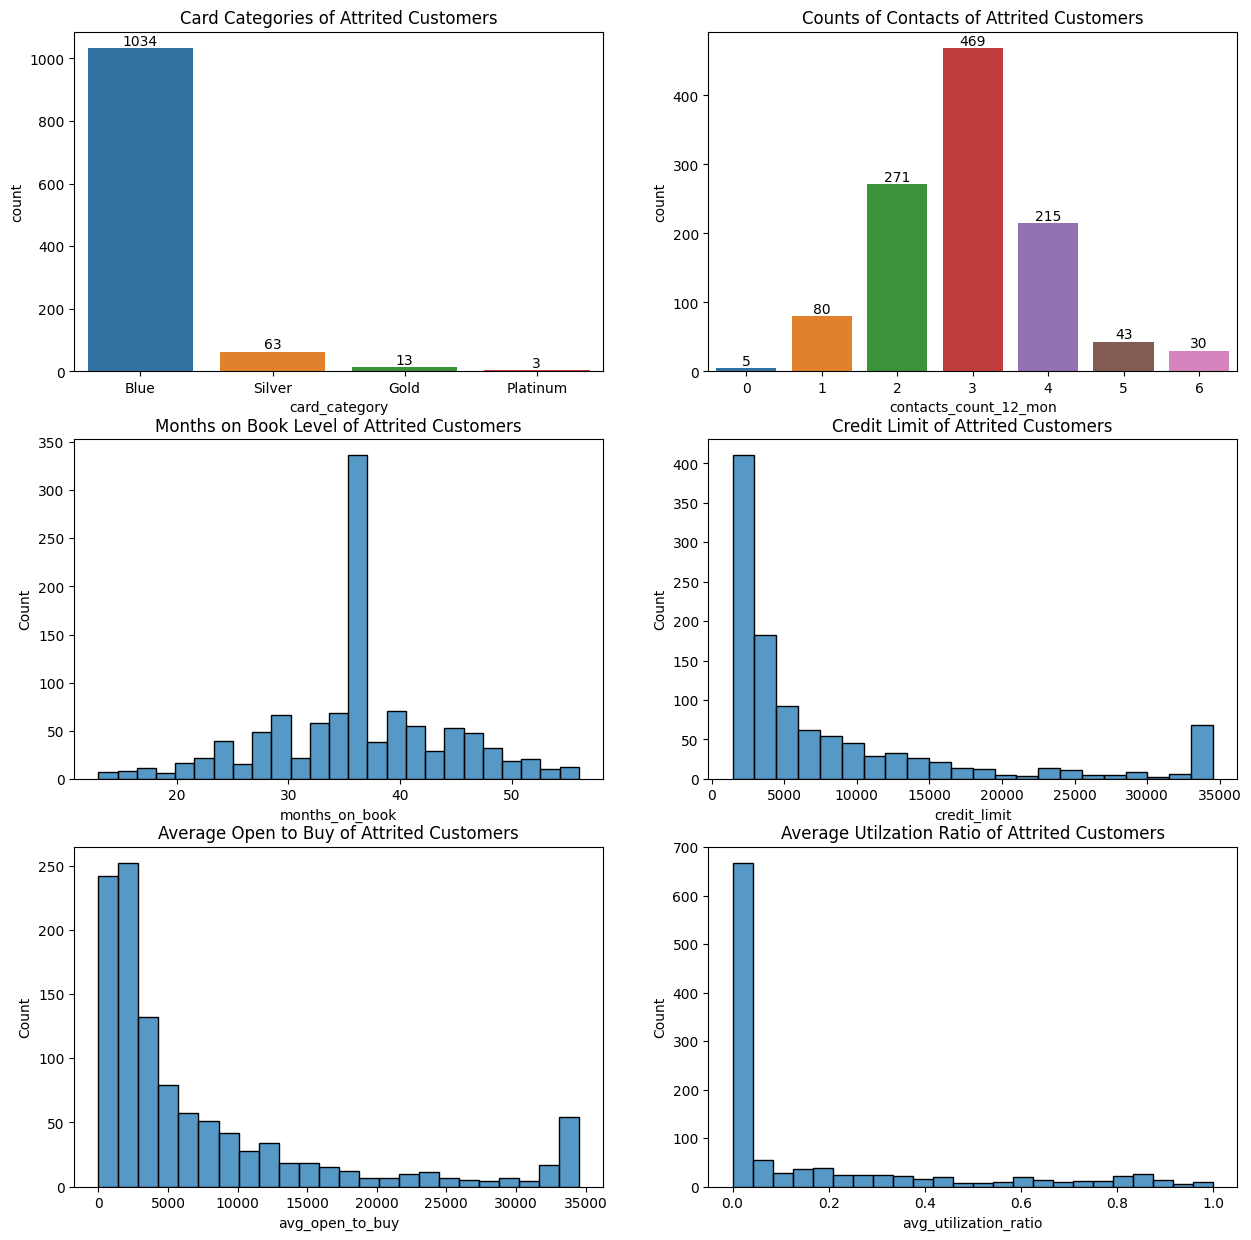

In [121]:
fig, axes = plt.subplots(3, 2, figsize=(15,15))
    
ax = sns.countplot(x="card_category", data=attr_df, ax=axes[0,0])
ax1 = sns.countplot(x="contacts_count_12_mon", data=attr_df, ax=axes[0,1])
ax2 = sns.histplot(x="months_on_book", data=attr_df, ax=axes[1,0])
ax3 = sns.histplot(x="credit_limit", data=attr_df, ax=axes[1,1])
ax4 = sns.histplot(x="avg_open_to_buy", data=attr_df, ax=axes[2,0])
ax5 = sns.histplot(x="avg_utilization_ratio", data=attr_df, ax=axes[2,1])
for i in ax.containers:
    ax.bar_label(i,);
for i in ax1.containers:
    ax1.bar_label(i,);
axes[0,0].set_title('Card Categories of Attrited Customers')
axes[0,1].set_title('Counts of Contacts of Attrited Customers')
axes[1,0].set_title('Months on Book Level of Attrited Customers')
axes[1,1].set_title('Credit Limit of Attrited Customers')
axes[2,0].set_title('Average Open to Buy of Attrited Customers')
axes[2,1].set_title('Average Utilzation Ratio of Attrited Customers')

> The vast majority of churned customers had been with the bank for 3 years and had 2-4 contacts with the bank. The vast majority also had blue cards, despite there being a more balanced distribution in credit limits and even a spike in higher credit limits (the same also holds true for average open to buy). This leads me to question if these customers would have had a better relationship with the bank (and thus less likely to leave) if they had been given better cards. I also notice that the vast majority of churned customers have 0 average utilization ratio. 

### 3. Are there differences in credit limits, average open to buy, and average utilization ratio between existing and attrited customers?

Text(0.5, 1.0, 'Average Utilization Ratio')

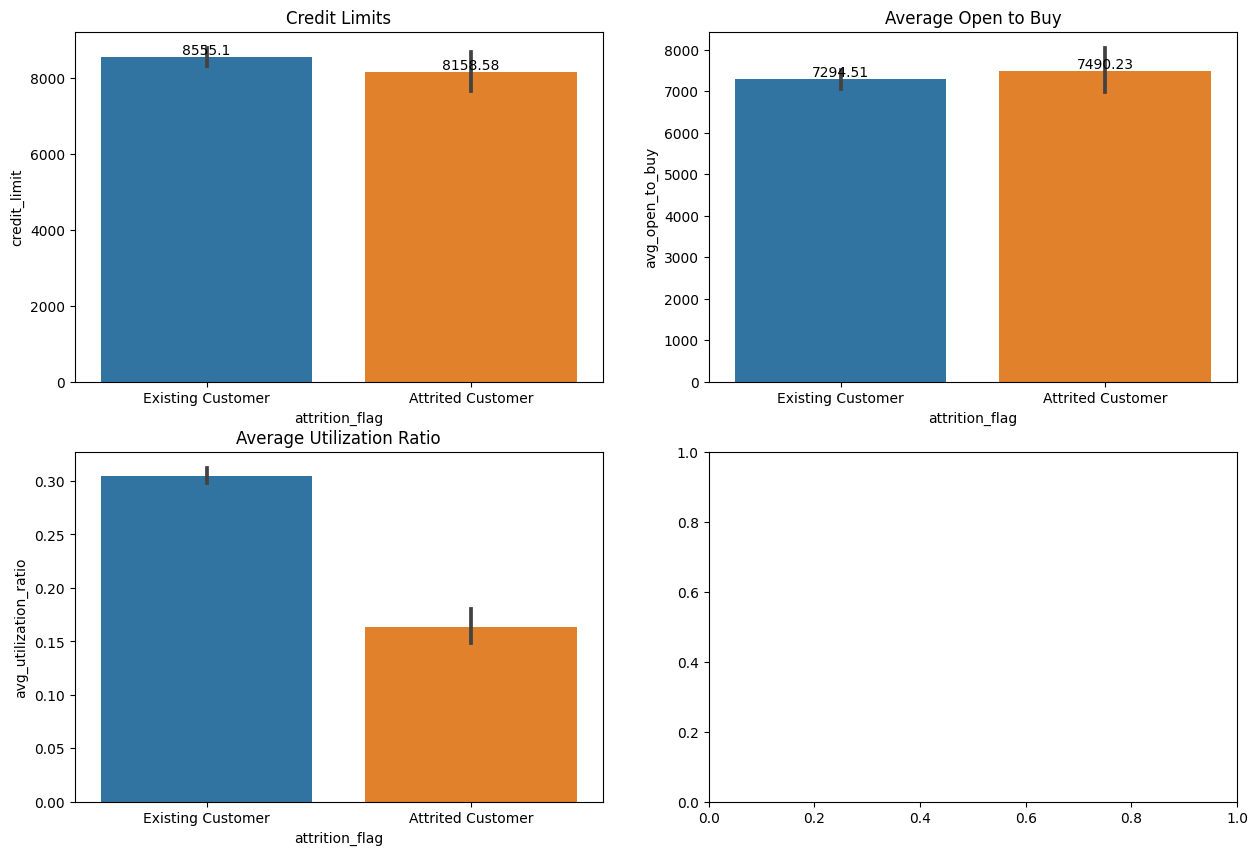

In [127]:
fig, axes = plt.subplots(2, 2, figsize=(15,10))
    
ax = sns.barplot(x='attrition_flag', y="credit_limit", data=clean_df, ax=axes[0,0])
ax1 = sns.barplot(x='attrition_flag', y="avg_open_to_buy", data=clean_df, ax=axes[0,1])
ax2 = sns.barplot(x='attrition_flag', y="avg_utilization_ratio", data=clean_df, ax=axes[1,0])
for i in ax.containers:
    ax.bar_label(i,);
for i in ax1.containers:
    ax1.bar_label(i,);
axes[0,0].set_title('Credit Limits')
axes[0,1].set_title('Average Open to Buy')
axes[1,0].set_title('Average Utilization Ratio')

> Looks like the average utilization ratio is a huge indicator of potential churn which makes their willingness to buy very important.

### 4. Are there other factors that affect willingness to buy? 

Text(0.5, 1.0, 'Relationship Count in Relation to Open to Buy')

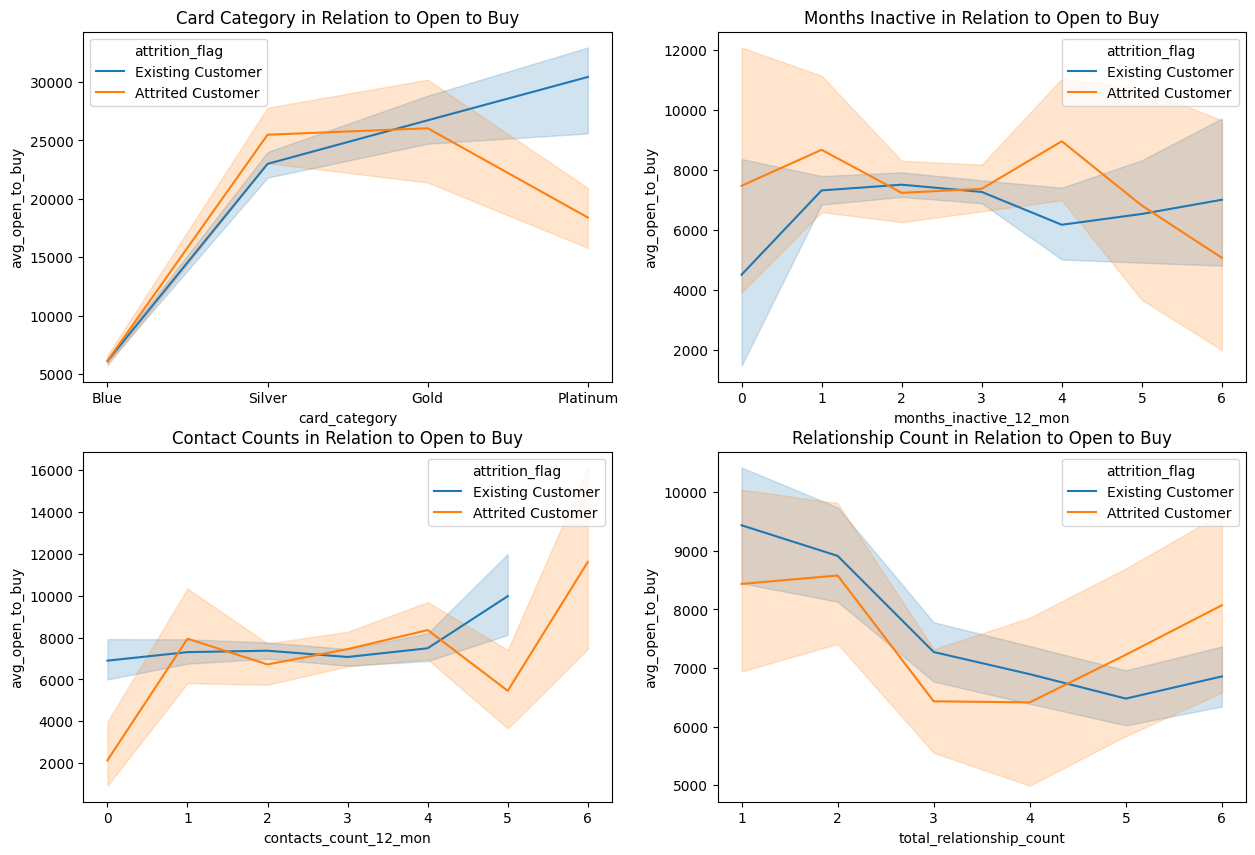

In [130]:
fig, axes = plt.subplots(2, 2, figsize=(15,10))
    
ax = sns.lineplot(x='card_category', y="avg_open_to_buy", hue="attrition_flag", data=clean_df, ax=axes[0,0])
ax1 = sns.lineplot(x='months_inactive_12_mon', y="avg_open_to_buy", hue="attrition_flag", data=clean_df, ax=axes[0,1])
ax2 = sns.lineplot(x='contacts_count_12_mon', y="avg_open_to_buy", hue="attrition_flag", data=clean_df, ax=axes[1,0])
ax3 = sns.lineplot(x='total_relationship_count', y="avg_open_to_buy", hue="attrition_flag", data=clean_df, ax=axes[1,1])

axes[0,0].set_title('Card Category in Relation to Open to Buy')
axes[0,1].set_title('Months Inactive in Relation to Open to Buy')
axes[1,0].set_title('Contact Counts in Relation to Open to Buy')
axes[1,1].set_title('Relationship Count in Relation to Open to Buy')

> Blue card customers are much less willing to buy! The more relationship counts a customer has the less likely they are to be open to buy, while the opposite peaks true for attrited customers. Customers with two relationships total tend to have the highest willingness to buy. Why is this? For existing customers, contact counts don't have much effect on them, however, contact counts largely affect attrited customers. 

# Conclusions 

- We had a huge number of people join the bank 3 years ago
- Why do we not have any customers over 5 years? 
- Customer willingness to buy goes down after 3 years with the bank
- Card type distribution is not in line with income and willlingness to buy distribution

# Recommendations

- Get more data about customer satisfaction. This is critically important to understanding why willingness to buy decreases the longer a customer is with the bank and the more total relationships they have. 
- Create a campaign to get higher value cards into more hands. This will increase willingness to buy and make more sense with current credit limit and income category distributions. This will assist in decreasing churn rate. 
- Focus on customers aged 40-49 from higher income brackets to have a big impact on lowering churn.

# Enriching The Data

I would love to have more information in order to dive deeper and understand more about the customer base. I would like to know:
- What kind of accounts the customers have (and what/if there are bonuses or fees associated with them)
- How, when , and why customers contacted the bank (Does higher contact only equate to churn when in relation to a problem or is higher contact a result of the process a customer must go through in order to leave the bank?)
- Location data (How do customers compare with other people in that area? Is there more churn when there are more banks available?)
- Customer contact reviews (Usually, banks ask customers to rate their interactions. Do lower interactions lead to higher churn?)
- Credit information (Why aren't all higher income customers getting the better cards? Do customers with rejected products have higher churn?)
- Dependent information (Do they have family members who also share the same bank? Does the type of dependent affect liklihood of churn?)